In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
from scipy import stats
import statsmodels.api as sm

import matplotlib.pyplot as plt
plt.style.use('seaborn')
import seaborn as sns

import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import itertools



# https://www.kaggle.com/eidanch/counties-geographic-coordinates







# Challenges cleaning data (null, different units of data, errant info)

# GEOPANDAS
# Folium https://python-visualization.github.io/folium/quickstart.html

# Merge on DF with lat/long and do heatmap?


# Break up DataFrame by species unless analyzing by compare/contrast

# Less obvious metrics? Defects? Research on terms and scoring. 
# https://worldcoffeeresearch.org/work/creating-sensory-lexicon-coffee/

# Plot geo map (origin and certifiers) as well as interesting altitude visual (mountain?)
# https://matthewkudija.com/blog/2018/05/25/country-maps/
# 3D plot from lecture

# Quality over altitude

# Background research (Rubric? Defects?)

# Linear regression? by variety?

# 3 to 5 hypothesis tests
# 1. Test altitude
# 2. Hemisphere
# 3. Regression perform better with or without defects?

# Anything not statistically significant? Or on the cusp?

# Best predictor of a good arabica coffee



In [2]:
coffee_df = pd.read_csv('merged_data_cleaned.csv')

In [3]:
# Checking columns

coffee_df.columns

Index(['Unnamed: 0', 'Species', 'Owner', 'Country.of.Origin', 'Farm.Name',
       'Lot.Number', 'Mill', 'ICO.Number', 'Company', 'Altitude', 'Region',
       'Producer', 'Number.of.Bags', 'Bag.Weight', 'In.Country.Partner',
       'Harvest.Year', 'Grading.Date', 'Owner.1', 'Variety',
       'Processing.Method', 'Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body',
       'Balance', 'Uniformity', 'Clean.Cup', 'Sweetness', 'Cupper.Points',
       'Total.Cup.Points', 'Moisture', 'Category.One.Defects', 'Quakers',
       'Color', 'Category.Two.Defects', 'Expiration', 'Certification.Body',
       'Certification.Address', 'Certification.Contact', 'unit_of_measurement',
       'altitude_low_meters', 'altitude_high_meters', 'altitude_mean_meters'],
      dtype='object')

In [4]:
country_data = pd.read_csv('countries.csv')

In [5]:
# Checking columns

country_data.head()

,country,latitude,longitude,name
0,AD,42.546245,1.601554,Andorra
1,AE,23.424076,53.847818,United Arab Emirates
2,AF,33.939110,67.709953,Afghanistan
3,AG,17.060816,-61.796428,Antigua and Barbuda
4,AI,18.220554,-63.068615,Anguilla


In [149]:
coffee_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1310 entries, 0 to 1309
Data columns (total 35 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Species                1310 non-null   object 
 1   Owner                  1303 non-null   object 
 2   Country.of.Origin      1309 non-null   object 
 3   Farm.Name              954 non-null    object 
 4   Mill                   1000 non-null   object 
 5   Company                1101 non-null   object 
 6   Altitude               1087 non-null   object 
 7   Region                 1253 non-null   object 
 8   Producer               1080 non-null   object 
 9   Harvest.Year           1263 non-null   object 
 10  Grading.Date           1310 non-null   object 
 11  Variety                1109 non-null   object 
 12  Processing.Method      1159 non-null   object 
 13  Aroma                  1310 non-null   float64
 14  Flavor                 1310 non-null   float64
 15  Afte

In [7]:
coffee_df.shape

(1339, 44)

In [8]:
country_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    244 non-null    object 
 1   latitude   244 non-null    float64
 2   longitude  244 non-null    float64
 3   name       245 non-null    object 
dtypes: float64(2), object(2)
memory usage: 7.8+ KB


In [9]:
 # removing the single 0 value for total cup points

coffee_df = coffee_df.drop(index=1310)

In [10]:
# fixing misplaced decimal in altitude entry

coffee_df.loc[[896, 1144], ['Altitude', 'altitude_low_meters', 'altitude_mean_meters', 'altitude_high_meters']]=1901.64

In [11]:
# Fixing incorrect altitude

coffee_df.loc[[543, 1040], ['Altitude', 'altitude_low_meters', 'altitude_mean_meters', 'altitude_high_meters']]=1100



In [12]:
# Correct country names

coffee_df.loc[coffee_df[coffee_df['Country.of.Origin']=="Cote d?Ivoire"].index,['Country.of.Origin']]="Cote d\'Ivoire"


In [13]:
# Dropping unncessary columns

coffee_df = coffee_df[coffee_df.Species=='Arabica'].drop('Lot.Number', axis=1).drop('Unnamed: 0', axis=1)

coffee_df = coffee_df.drop('Owner.1', axis=1).drop('ICO.Number', axis=1)

coffee_df = coffee_df.drop('Number.of.Bags', axis=1).drop('Bag.Weight', axis=1)

coffee_df = coffee_df.drop('In.Country.Partner', axis=1).drop('Expiration', axis=1)

coffee_df = coffee_df.drop('unit_of_measurement', axis=1)

In [14]:
# checking remaining columns

coffee_df.columns

Index(['Species', 'Owner', 'Country.of.Origin', 'Farm.Name', 'Mill', 'Company',
       'Altitude', 'Region', 'Producer', 'Harvest.Year', 'Grading.Date',
       'Variety', 'Processing.Method', 'Aroma', 'Flavor', 'Aftertaste',
       'Acidity', 'Body', 'Balance', 'Uniformity', 'Clean.Cup', 'Sweetness',
       'Cupper.Points', 'Total.Cup.Points', 'Moisture', 'Category.One.Defects',
       'Quakers', 'Color', 'Category.Two.Defects', 'Certification.Body',
       'Certification.Address', 'Certification.Contact', 'altitude_low_meters',
       'altitude_high_meters', 'altitude_mean_meters'],
      dtype='object')

In [15]:
# looking at numerical data

coffee_df.describe()

,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness,Cupper.Points,Total.Cup.Points,Moisture,Category.One.Defects,Quakers,Category.Two.Defects,altitude_low_meters,altitude_high_meters,altitude_mean_meters
count,1310.000000,1310.000000,1310.000000,1310.000000,1310.000000,1310.000000,1310.000000,1310.000000,1310.000000,1310.000000,1310.000000,1310.000000,1310.000000,1309.000000,1310.000000,1083.000000,1083.000000,1083.000000
mean,7.569580,7.523809,7.403344,7.538863,7.523466,7.523244,9.840901,9.840626,9.910832,7.503588,82.178611,0.088840,0.426718,0.177235,3.593130,1302.517402,1351.857768,1327.187585
std,0.315845,0.341897,0.349867,0.319912,0.293129,0.349304,0.489058,0.722158,0.454991,0.427138,2.686039,0.047967,1.833077,0.840890,5.352233,467.515358,502.126227,475.991225
min,5.080000,6.080000,6.170000,5.250000,5.250000,6.080000,6.000000,0.000000,1.330000,5.170000,59.830000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,7.420000,7.330000,7.250000,7.330000,7.330000,7.330000,10.000000,10.000000,10.000000,7.250000,81.170000,0.090000,0.000000,0.000000,0.000000,1100.000000,1100.000000,1100.000000
50%,7.580000,7.580000,7.420000,7.500000,7.500000,7.500000,10.000000,10.000000,10.000000,7.500000,82.500000,0.110000,0.000000,0.000000,2.000000,1310.640000,1350.000000,1310.640000
75%,7.750000,7.750000,7.580000,7.750000,7.670000,7.750000,10.000000,10.000000,10.000000,7.750000,83.670000,0.120000,0.000000,0.000000,4.000000,1589.500000,1650.000000,1600.000000
max,8.750000,8.830000,8.670000,8.750000,8.580000,8.750000,10.000000,10.000000,10.000000,10.000000,90.580000,0.280000,31.000000,11.000000,55.000000,4287.000000,5900.000000,4287.000000


In [16]:
# Country List

country_list = list(coffee_df['Country.of.Origin'].unique())

# Defect per Sample

defects = coffee_df[['Category.One.Defects', 'Category.Two.Defects', 'Quakers']]

# origin_points

origin_points = coffee_df[['Country.of.Origin','Total.Cup.Points']]

# Production Columns

production_columns = ['Owner', 'Farm.Name', 'Mill', 'Company', 'Region', 'Producer', 'Certification.Body']


# Bootstrap Function

def bootstrap_sample_means(data, n_bootstrap_samples=10**4):
    bootstrap_sample_means = []
    for i in range(n_bootstrap_samples):
        bootstrap_sample = np.random.choice(data, size=len(data), replace=True)
        bootstrap_sample_means.append(np.mean(bootstrap_sample))
    return bootstrap_sample_means

# Empirical Distribution Function

def empirical_distribution(x, data):
    weight = 1.0 / len(data)
    count = np.zeros(shape=len(x))
    for datum in data:
        count = count + np.array(x >= datum)
    return weight * count

def superimpose_cdf_of_fit_model(data, model, ax, x_lower=-3, x_upper=3):
    x = np.linspace(x_lower, x_upper, num=10000)
    ax.plot(x, empirical_distribution(x, data), linewidth=2, label='Actual Distribution')
    ax.plot(x, model.cdf(x), linewidth=2, label='Model Distribution')
    
# Merge coffee and country dataframes for latitude/longitude data

data_with_lat = coffee_df.merge(country_data, 'left', left_on='Country.of.Origin', right_on='name')

# Correct latitude NaN values for different column name

data_with_lat.loc[data_with_lat[data_with_lat['Country.of.Origin']=='Tanzania, United Republic Of'].index,['latitude']]=-6.369028

data_with_lat.loc[data_with_lat[data_with_lat['Country.of.Origin']=='Myanmar'].index,['latitude']]=21.913965

data_with_lat.loc[data_with_lat[data_with_lat['Country.of.Origin']=="Cote d\'Ivoire"].index,['latitude']]=7.539989



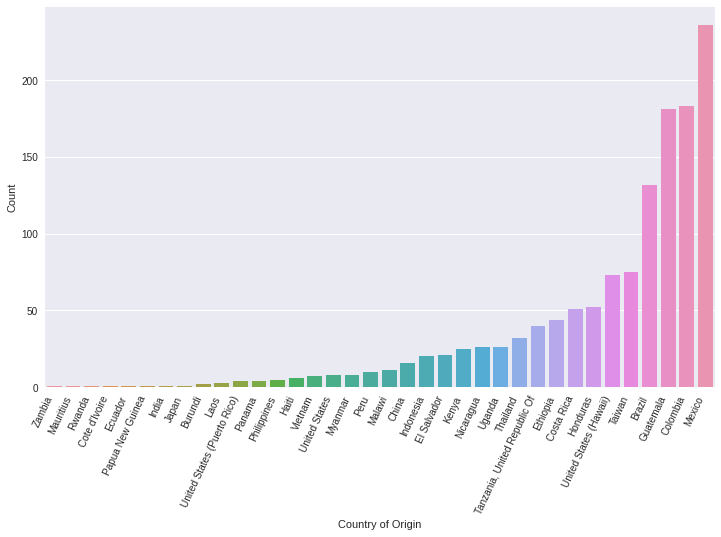

In [35]:
# EDA of Coffee Data

fig, ax = plt.subplots(figsize=(12,7))

rev_per_country = pd.DataFrame(coffee_df.groupby('Country.of.Origin').count()['Species'].sort_values())

# _ = ax.bar(x=rev_per_country['Country.of.Origin'], height=rev_per_country)



sns.barplot(x=rev_per_country.index, y=rev_per_country['Species'])

ax.set_ylabel("Count")
ax.set_xlabel("Country of Origin")

ax.set_xticklabels(labels=rev_per_country.index, rotation = (65), fontsize = 10, va='top', ha='right');

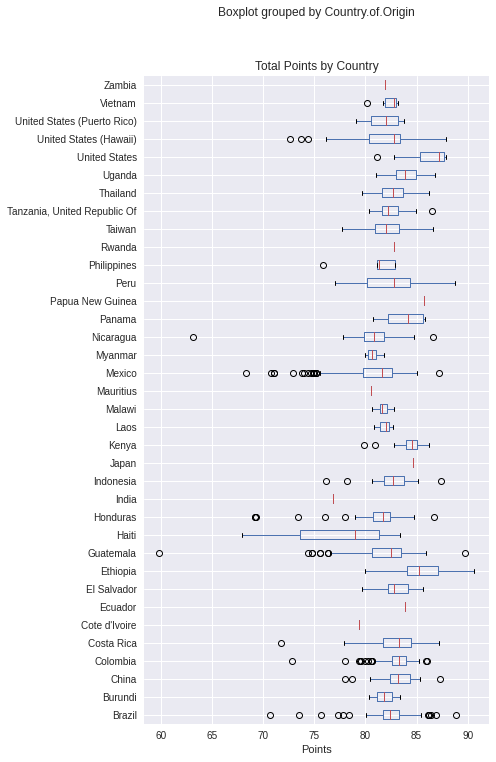

In [37]:
fig, ax = plt.subplots(figsize=(6,12))

origin_points.boxplot(ax=ax, by="Country.of.Origin", vert=False)

ax.set_title('Total Points by Country')

ax.set_xlabel("Points")

plt.show();

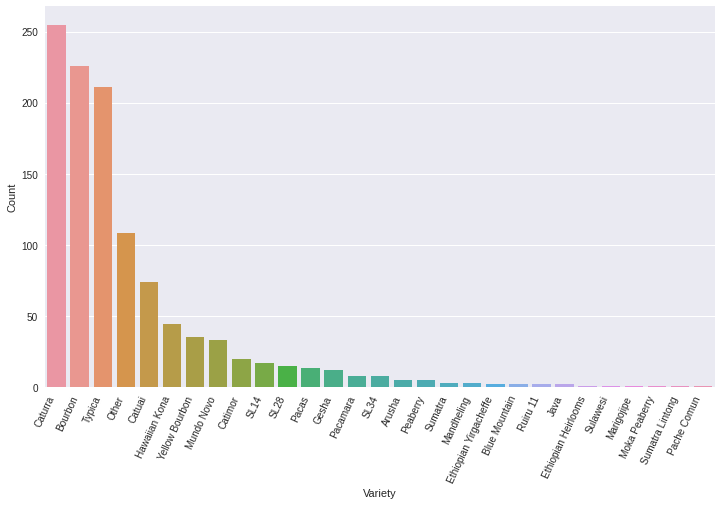

In [38]:
fig, ax = plt.subplots(figsize=(12,7))

variety_x = coffee_df['Variety'].dropna().unique()

variety_y = pd.DataFrame(coffee_df.groupby('Variety').count()["Species"].sort_values(ascending=False))

sns.barplot(x=variety_y.index, y=variety_y['Species'])

ax.set_xticklabels(labels=variety_y.index, rotation = (65), fontsize = 10, va='top', ha='right')

ax.set_xlabel("Variety")

ax.set_ylabel("Count");

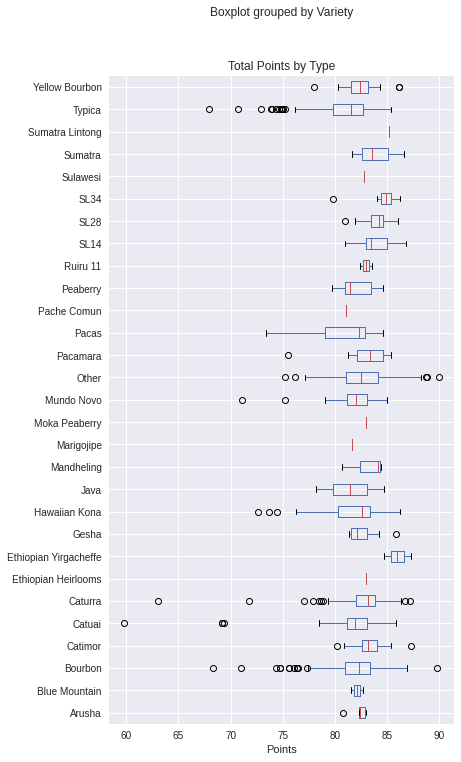

In [90]:
fig, ax = plt.subplots(figsize=(6,12))

variety_points = coffee_df[['Variety','Total.Cup.Points']]

variety_points.boxplot(ax=ax, by="Variety", vert=False)

ax.set_xlabel('Points')

ax.set_title('Total Points by Type')

plt.show();

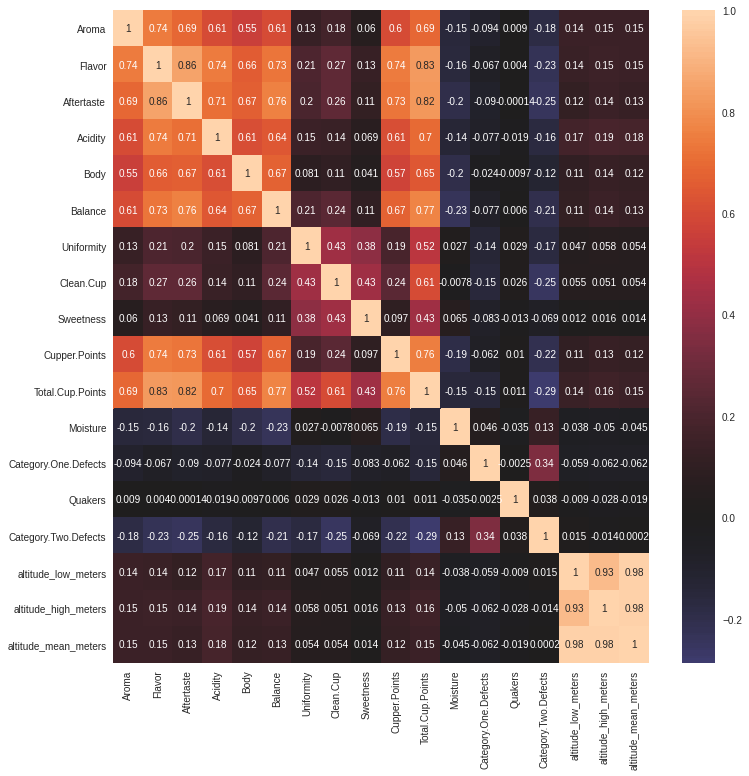

In [44]:
# Look at correlation heatmap for all numeric factors

fig, ax = plt.subplots(figsize=(12,12))

sns.set_palette='Mako'

sns.heatmap(coffee_df.corr(), ax=ax, annot=True, center=0);


In [21]:
'''
Columns split between information about the source of the beans and scoring rubrics
Looking at rubric by which coffee is scored, obvious choices like acidity, aftertaste, body or mouthfeel.
moisture and uniformity I thought were initially good to include 
but ultimately not. Sweetness would also seem important, but almost all scored 10 so not so helpful.
Including defects to check for negative correlation with total points.
Research on what these mean
'''

score_columns = ['Acidity', 'Aftertaste', 'Aroma', 'Balance', 'Category.One.Defects', 'Category.Two.Defects','Body', 'Flavor'] 

total_score_columns = ['Acidity', 'Aftertaste', 'Aroma', 'Balance', 'Category.One.Defects', 'Category.Two.Defects','Body', 'Flavor', 'Total.Cup.Points'] 

corr = coffee_df[total_score_columns].corr()

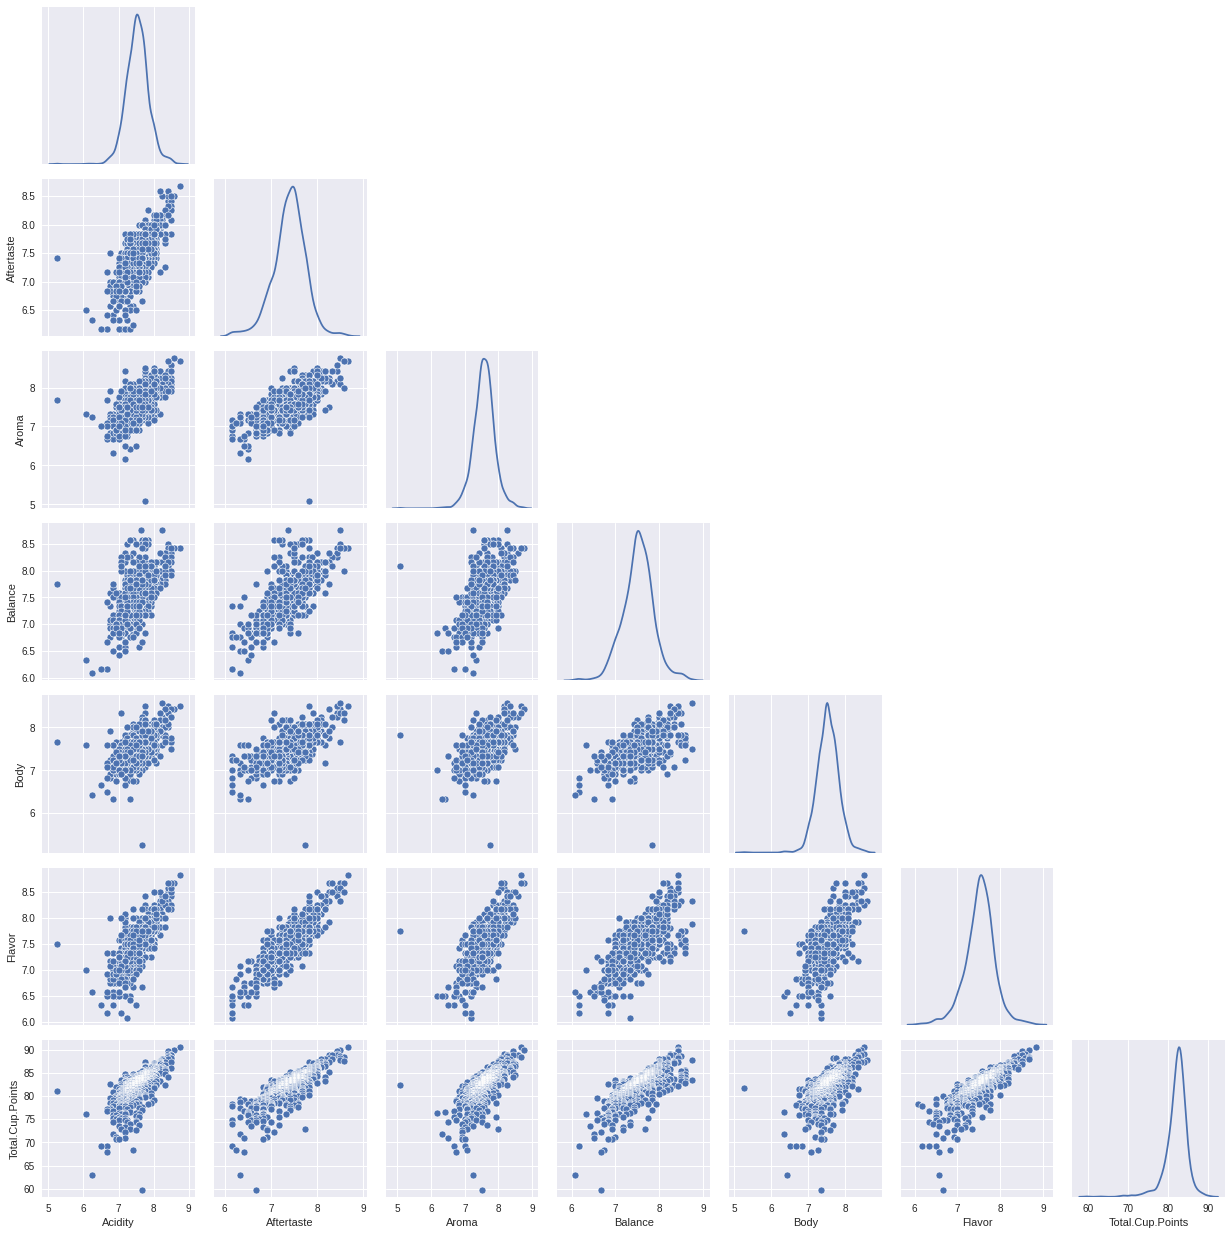

In [48]:
g = sns.PairGrid(coffee_df[['Acidity', 'Aftertaste', 'Aroma', 'Balance','Body', 'Flavor', 'Total.Cup.Points']], diag_sharey=False, corner=True, palette='viridis')
# g.set_palette='rocket'
g.map_diag(sns.kdeplot)
g.map_lower(sns.scatterplot);

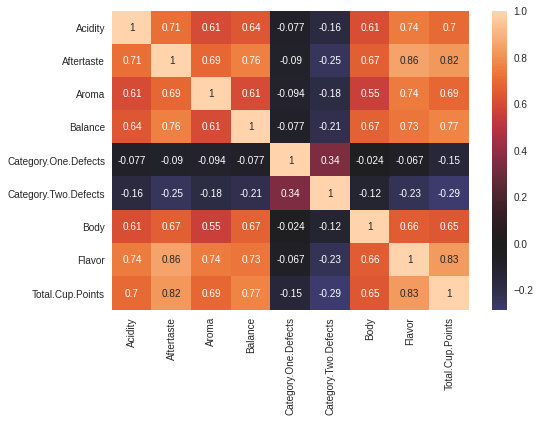

In [49]:
sns.heatmap(corr, annot=True, center=0)


plt.savefig('QualityMeasureHeatmap.png')

plt.show();

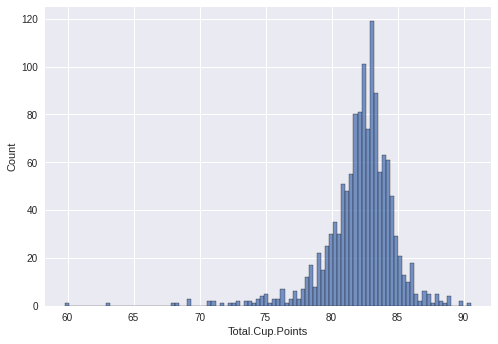

In [50]:
'''
Total Points or Total Cup Points are the primary attribute by which we'll guage the quality of a sample of 
coffee, so briefly want to look at the distribution of Total Cup Points
'''

total_points = coffee_df['Total.Cup.Points']


sns.histplot(coffee_df['Total.Cup.Points'], bins=100);

In [150]:
tpm, tps = total_points.mean(), total_points.std()

tpm, tps

(82.1786106870228, 2.6860386671649508)

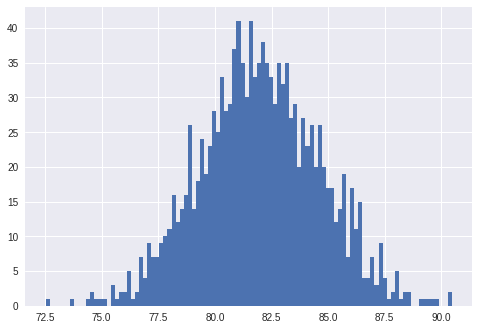

In [59]:
norm = stats.norm(loc=tpm, scale=tps)

plt.hist(norm.rvs(1300), bins=100);

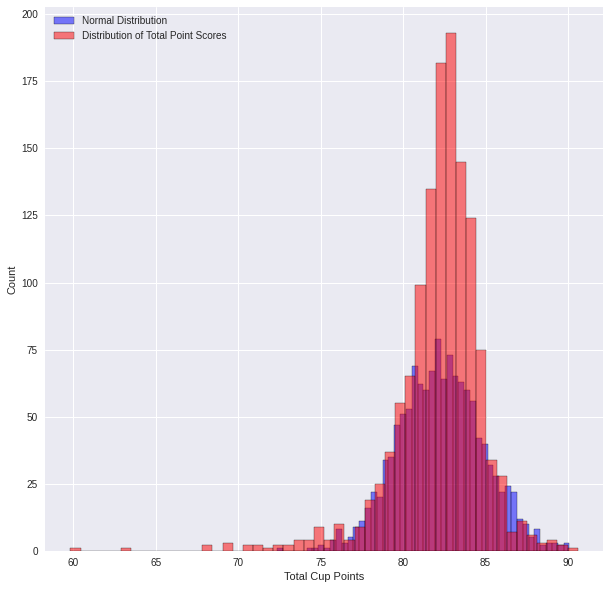

In [100]:
fig, ax = plt.subplots(figsize=(10,10))

sns.histplot(norm.rvs(1300), bins =50, alpha=.5, color='blue', label="Normal Distribution")

sns.histplot(total_points, bins=50, alpha=.5, color='red', label='Distribution of Total Point Scores')

ax.set_xlabel('Total Cup Points')

ax.legend();



(70.0, 95.0)

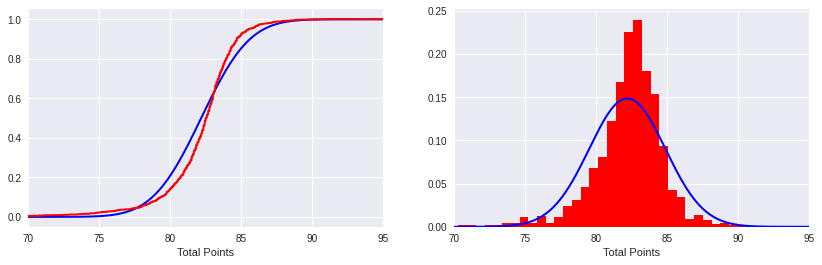

In [101]:
x = np.linspace(70, 99, num=1300)
fig, ax = plt.subplots(1, 2, figsize=(14, 4))

ax[0].plot(x, norm.cdf(x), linewidth=2, color='blue')
ax[0].scatter(0.75, norm.cdf(0.75), s=100)
# ax[0].axhline(y=norm.cdf(0.75), linestyle="--") 
ax[0].set_xlim(70, 95)
ax[0].plot(x, empirical_distribution(x, total_points), linewidth=2, color='red')
ax[0].set_xlabel('Total Points')
ax[1].set_xlabel('Total Points')
# ax[0].set_title("Evaluate the Distribution Function")

ax[1].plot(x, norm.pdf(x), linewidth=2, color='blue')
ax[1].hist(total_points, bins=50, density=True, color='red')
ax[1].set_xlim(70, 95)


82.17847313129772
0.07451534492106378


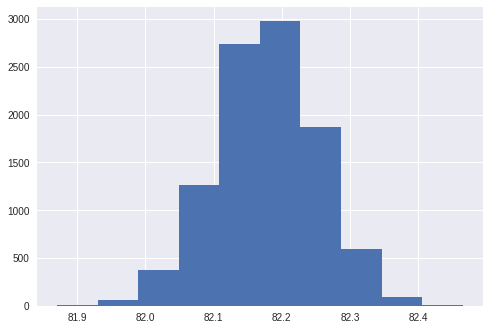

In [106]:
boot_points = bootstrap_sample_means(total_points)

print(np.mean(boot_points))

print(np.std(boot_points))

plt_xlabel=('Mean Total Score')

plt.hist(boot_points);

No handles with labels found to put in legend.


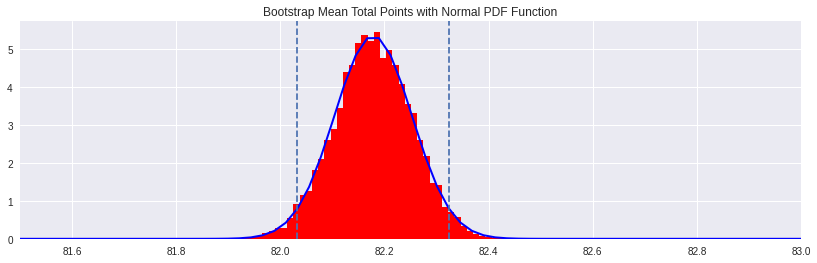

In [107]:
x = np.linspace(70, 99, num=1300)
normal = stats.norm(np.mean(boot_points), np.std(boot_points))

fig, ax = plt.subplots(figsize=(14, 4))



ax.set_title("Bootstrap Mean Total Points with Normal PDF Function")
ax.set_xlabel=('Mean Total Score')
ax.plot(x, normal.pdf(x), linewidth=2, color='blue')
ax.axvline(x=normal.ppf(0.025), linestyle="--") 
ax.axvline(x=normal.ppf(0.975), linestyle="--") 
ax.hist(boot_points, bins=50, density=True, color='red')
ax.set_xlim(81.5, 83)
# ax.set_xlabel('Mean Total Points')
ax.legend();

# CONFIDENCE INTERVAL ABOUT POPULATION MEAN OF COFFEE

In [86]:
normal.ppf(0.025), normal.ppf(0.975)

(82.03406815631332, 82.3222681490302)

In [ ]:
'''
Show globe graphs here. Coffee grown all over the world, what separates coffee from one region from another?
Start with cutting world in two using other CSV of country data: Northern and Southern Hemispheres
For the sake of simplicity (while I acknowledge that some countries are on both hemispheres), separated
by latitudes supplied in the CSV, which came from Google's data (show what these latitudes plot?)
'''

In [31]:
'''
In looking for plotting geographical data from the global perspective, first encountered basemap (which
is apparently deprecated and would not work with currently supported Pandas or Matplotlib), so switched to 
Cartopy package. Using a shapefile and the .reader method to extract and plot the countries of origin.
'''

def area(ax, iso, clr) :
    shp = shpreader.natural_earth(resolution='10m',category='cultural',
                                  name='admin_0_countries')
    reader = shpreader.Reader(shp)
    for n in reader.records() :
        if n.attributes['ADM0_A3'] == iso: 
            ax.add_geometries([n.geometry], ccrs.PlateCarree(), facecolor=clr, 
                              alpha = 1.00, linewidth =0.15, edgecolor = "black",
                              label=n.attributes['ADM0_A3']) 
    return ax

iso3 = []

shp = shpreader.natural_earth(resolution='10m',category='cultural',
                              name='admin_0_countries')
reader = shpreader.Reader(shp)


country_code_dict = {n.attributes['FORMAL_EN']: n.attributes['ADM0_A3'] for n in reader.records()}

for n in reader.records():
    if n.attributes['BRK_NAME'] in country_list:
        iso3.append(n.attributes['ADM0_A3'])

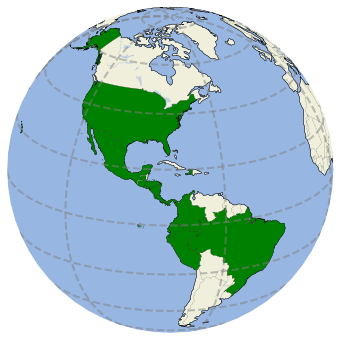

In [32]:
plt.figure(figsize=(13,6))

iso3

ax = plt.axes(projection=ccrs.Orthographic(-80,20))
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAKES, alpha=0.5)
ax.add_feature(cfeature.RIVERS)
ax.gridlines(crs=ccrs.PlateCarree(),
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')

for n in iso3 :
    area(ax, n, "green")
    
plt.show()

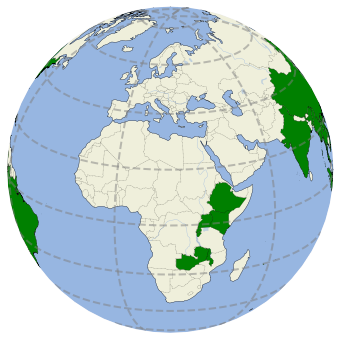

In [33]:
fig, ax = plt.subplots(figsize=(13,6))

ax = plt.axes(projection=ccrs.Orthographic(20,20))

ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAKES, alpha=0.5)
ax.add_feature(cfeature.RIVERS)
ax.gridlines(crs=ccrs.PlateCarree(),
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')

for n in iso3 :
    area(ax, n, "green")
    
plt.show();


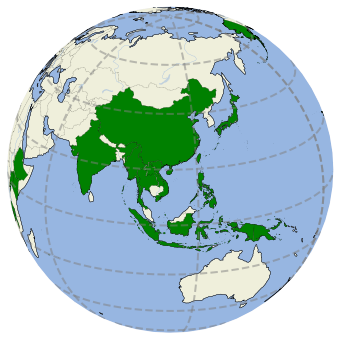

In [34]:
plt.figure(figsize=(13,6))

ax = plt.axes(projection=ccrs.Orthographic(110,20))
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAKES, alpha=0.5)
ax.add_feature(cfeature.RIVERS)
ax.gridlines(crs=ccrs.PlateCarree(),
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')

for n in iso3 :
    area(ax, n, "green")
    
plt.show()

In [ ]:
# Test if coffee from northern and southern hemispheres significantally different

In [37]:
# Use both Country Data dataframe to separate into Northern and Southern Hemispheres

n_hemi = pd.DataFrame(country_data[country_data['latitude']>0])

s_hemi = pd.DataFrame(country_data[country_data['latitude']<0])

In [38]:
north_ctry = [c for c in n_hemi.name if c in country_list]

In [39]:
south_ctry = [c for c in s_hemi.name if c in country_list]

In [57]:
nmask = coffee_df['Country.of.Origin'].isin(north_ctry)

# coffee_df[nmask]

In [58]:
smask = coffee_df['Country.of.Origin'].isin(south_ctry)

# coffee_df[smask]

In [48]:
north_boot_points = coffee_df[nmask]['Total.Cup.Points']

south_boot_points = coffee_df[smask]['Total.Cup.Points']

north_boot_points = bootstrap_sample_means(north_boot_points)

south_boot_points = bootstrap_sample_means(south_boot_points)

In [49]:
# Test if coffee from northern and southern hemispheres significantally different

stats.ttest_ind(north_boot_points, south_boot_points, equal_var=False)

res = stats.ttest_ind(north_boot_points, south_boot_points, equal_var=False)

In [50]:
res

Ttest_indResult(statistic=-286.7257014042187, pvalue=0.0)

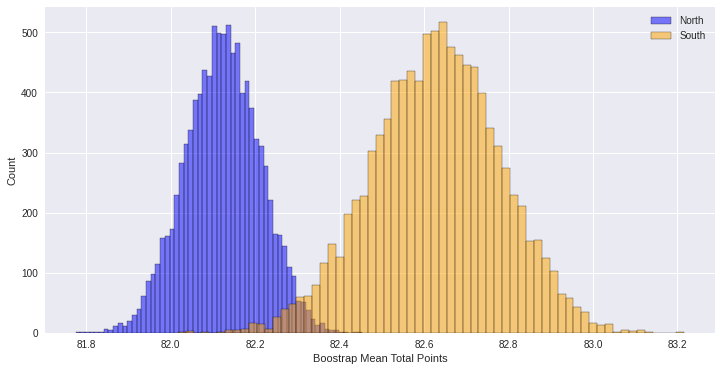

In [532]:
# Variance appears very different, show var?

fig, ax = plt.subplots(figsize=(12,6))

sns.histplot(data=north_boot_points, alpha=.5, color='blue', label='North')
sns.histplot(data=south_boot_points, alpha=.5, color='orange', label='South')

ax.set_xlabel('Boostrap Mean Total Points')

ax.legend();

In [70]:
# Mexico by far has supplied the most samples, does this mean Mexican coffee is better or worse than rest of world?
# In other words, could coffee from Mexico be representative of the global quality of coffee?
# Null is Mexican coffee is no different
# Alternative is that it is

mexico_boot_points = coffee_df[coffee_df['Country.of.Origin'] == 'Mexico']['Total.Cup.Points']

rest_of_globe_boot_points = coffee_df[coffee_df['Country.of.Origin'] != 'Mexico']['Total.Cup.Points']

mexico_boot_points = bootstrap_sample_means(mexico_boot_points)

rest_of_globe_boot_points = bootstrap_sample_means(rest_of_globe_boot_points)


In [73]:
res = stats.ttest_ind(mexico_boot_points, rest_of_globe_boot_points, equal_var=False)

res
print("P-value that coffee grown in Mexico is statistically significantly different: {:2.9f}".format(res.pvalue))

P-value that coffee grown in Mexico is statistically significantly different: 0.000000000


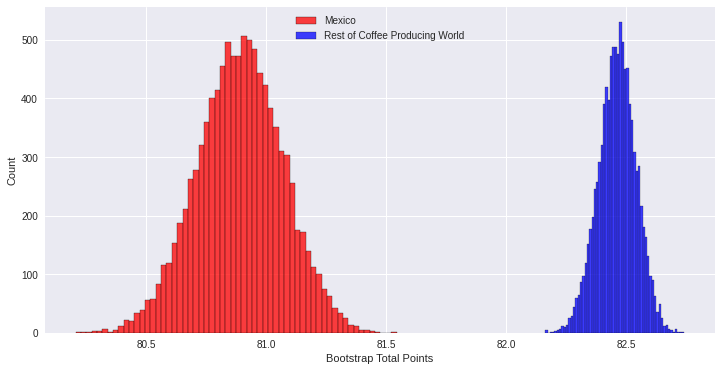

In [533]:
# IMPROVE THIS PLOT

fig, ax = plt.subplots(figsize=(12, 6))

sns.histplot(mexico_boot_points, color='red', label='Mexico')
sns.histplot(rest_of_globe_boot_points, color='blue', label="Rest of Coffee Producing World");
ax.set_xlabel('Bootstrap Total Points')
ax.set_ylabel('Count')
ax.legend()

/home/mario/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


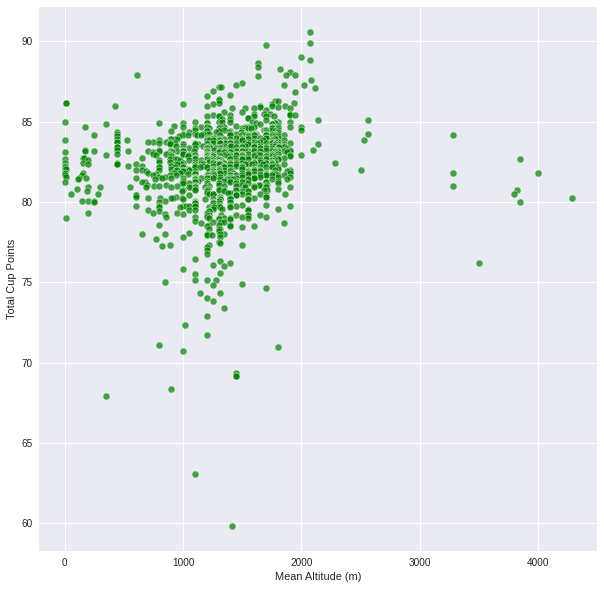

In [108]:
# IMPROVE THIS PLOT

fig, ax = plt.subplots(figsize=(10,10))

sns.scatterplot(coffee_df['altitude_mean_meters'], coffee_df['Total.Cup.Points'], alpha=.7,  color='green')

ax.set_xlabel('Mean Altitude (m)')
ax.set_ylabel('Total Cup Points');

In [66]:
# Is coffee grown around 2000 meters statistically significantly better? One tail test
# H0 = There is no difference in quality between samples from around 2000 m and other altitudes
# Ha = Coffee grown at around 2000 meters is statistically significantly better

two_thou_alt = coffee_df[(coffee_df['altitude_mean_meters'] > 1800) & (coffee_df['altitude_mean_meters'] < 2200)]['Total.Cup.Points']

other_alt = coffee_df[(coffee_df['altitude_mean_meters'] < 1800) | (coffee_df['altitude_mean_meters'] > 2200)]['Total.Cup.Points']

# Use Mann-Whitney U Test to take means and test against each other for non-parametric data

In [67]:
res = stats.mannwhitneyu(two_thou_alt, other_alt, alternative='greater')

print("P-value that coffee grown around 2000 meters statistically significantly better: {:2.9f}".format(res.pvalue))


P-value that coffee grown around 2000 meters statistically significantly better: 0.000000001


In [152]:
# poisson distribution? Hypothesis test? Log likelihood
# Use mean and std of total.cup.points to plot pdf or PMF if normal. Hypothesis test if normal?
# Run CLT or boostrap from point stats (plot compared to normal dist with same mean, std)
# What would regression do? goal of regression?


defects['Total.Defects'] = defects['Category.One.Defects'] + defects['Category.Two.Defects'] + defects['Quakers']

/home/mario/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [153]:
dfct_per_samp = (defects['Total.Defects']/(defects['Total.Defects'].count())).sum()
dfct_per_samp

4.198624904507257

In [349]:
pois = stats.poisson(dfct_per_samp)

test_x = np.linspace(0,12,1000)

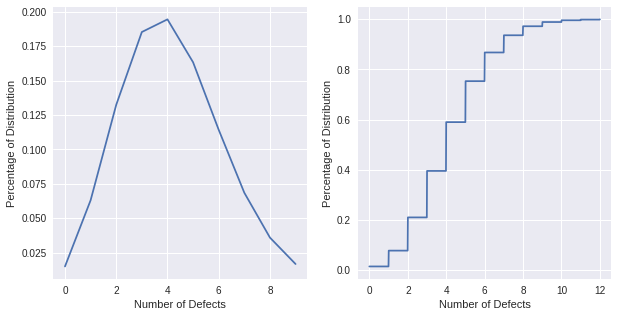

In [528]:
fig, axs = plt.subplots(1,2, figsize=(10,5))

x = np.arange(stats.poisson.ppf(0.01, dfct_per_samp),
              stats.poisson.ppf(0.99, dfct_per_samp))

axs[0].set_xlabel('Number of Defects')
axs[0].set_ylabel('Percentage of Distribution')

axs[1].set_xlabel('Number of Defects')
axs[1].set_ylabel('Percentage of Distribution')


axs[0].plot(x, stats.poisson.pmf(k=x, mu=dfct_per_samp))

axs[1].plot(test_x, pois.cdf(test_x));

/home/mario/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in greater_equal


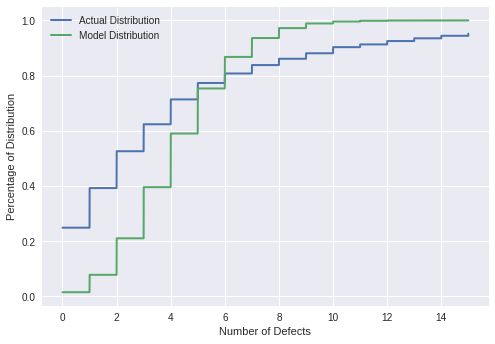

In [529]:
fig, ax = plt.subplots()

superimpose_cdf_of_fit_model(defects['Total.Defects'], stats.poisson(mu=dfct_per_samp), ax=ax, x_lower=0, x_upper=15)
ax.set_xlabel('Number of Defects')
ax.set_ylabel('Percentage of Distribution')
ax.legend();

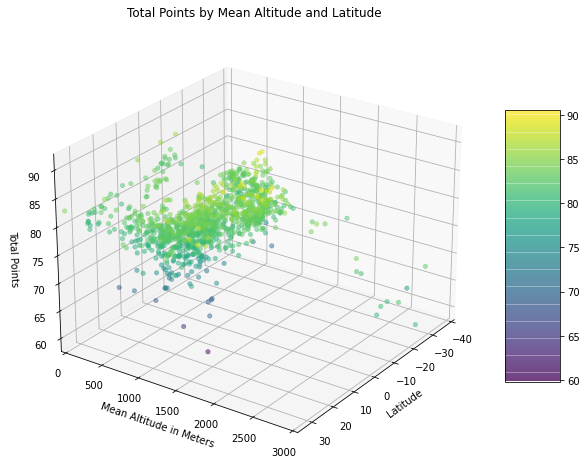

In [445]:
from mpl_toolkits.mplot3d import Axes3D
from pylab import meshgrid


X, Y = data_with_lat['latitude'] + 10 * np.random.rand(data_with_lat.shape[0]) - 0.15, data_with_lat['altitude_mean_meters'] + 10 * np.random.rand(data_with_lat.shape[0]) - 0.15
Z = data_with_lat['Total.Cup.Points'] # + 0.1 * np.random.rand(data_with_lat.shape[0]) - 0.15

fig = plt.figure(figsize=(10,10))

# ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
#                 cmap='viridis', edgecolor='none')
# ax.set_title('surface')

# plt.show();



# ax = fig.gca(projection='3d')
# ax.plot_surface(X, Y, Z)
# plt.show()

ax = plt.axes(projection='3d')
scatter = ax.scatter(X,Y,Z, c=Z, cmap='viridis', linewidth=0.5, alpha=.5);
# ax.plot_trisurf(X,Y,Z, cmap='viridis', edgecolor='none');
fig.colorbar(scatter, shrink=0.5, aspect=5)
ax.view_init(25, 35)
ax.set_title('Total Points by Mean Altitude and Latitude')

ax.set_xlim(-40,35)
ax.set_ylim(0,3000)

ax.set_xlabel('Latitude')
ax.set_ylabel('Mean Altitude in Meters')
ax.set_zlabel('Total Points');

In [328]:
data_with_lat['latitude'].shape, data_with_lat['altitude_mean_meters'].shape

((1310,), (1310,))

In [517]:
coffee_df.loc[coffee_df[pd.isna(coffee_df['altitude_mean_meters'])].index, ['altitude_mean_meters']] = coffee_df['altitude_mean_meters'].mean()

In [518]:
coffee_df[pd.isna(coffee_df['altitude_mean_meters'])]

,Species,Owner,Country.of.Origin,Farm.Name,Mill,Company,Altitude,Region,Producer,Harvest.Year,...,Category.One.Defects,Quakers,Color,Category.Two.Defects,Certification.Body,Certification.Address,Certification.Contact,altitude_low_meters,altitude_high_meters,altitude_mean_meters


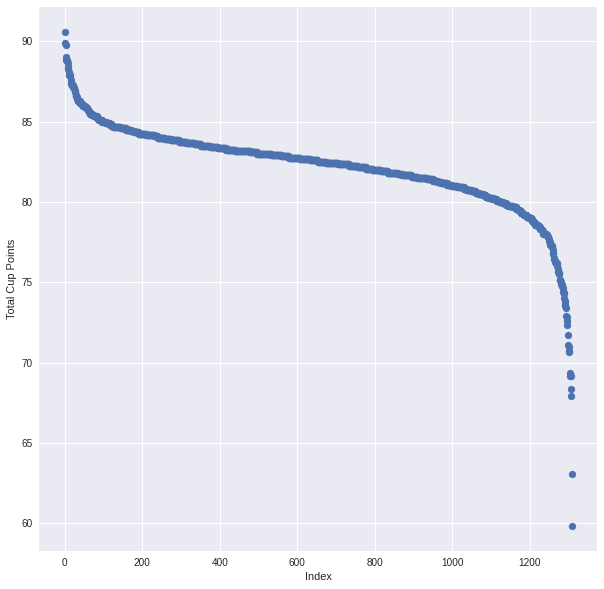

In [110]:
# Perform Ordinary Least Squares regression to test predictive ability of individual score parameters, as well
# as Category One and Category Two defects

fig, ax = plt.subplots(figsize=(10,10))

score_np = np.array(coffee_df[score_columns])

total_np = np.array(coffee_df['Total.Cup.Points']).reshape(-1,1)

plt.scatter(np.arange(len(total_np)), total_np)

ax.set_xlabel('Index')
ax.set_ylabel('Total Cup Points');

In [111]:
OLS_model = sm.OLS(total_np, score_np)

OLS_res = OLS_model.fit()

OLS_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          4.757e+05
Date:                Fri, 30 Oct 2020   Prob (F-statistic):                        0.00
Time:                        10:18:16   Log-Likelihood:                         -2407.8
No. Observations:                1310   AIC:                                      4832.
Df Residuals:                    1302   BIC:                                      4873.
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.5412      0.203      7.605      0.000       1.144       1.939
x2             1.3117      0.261      5.026      0.000       0.800       1.824
x3             2.0069      0.194     10.364      0.000       1.627       2.387
x4             2.0821      0.202     10.290      0.000       1.685       2.479
x5            -0.0652      0.025     -2.654      0.008      -0.113      -0.017
x6            -0.0039      0.009     -0.452      0.652      -0.021       0.013
x7             1.8342      0.198      9.250      0.000       1.445       2.223
x8             2.1541      0.279      7.726      0.000       1.607       2.701
==============================================================================
Omnibus:                      789.615   Durbin-Watson:                   1.121
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            17418.207
Skew:                          -2.372   Prob(JB):                         0.00
Kurtosis:                      20.222   Cond. No.                         149.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

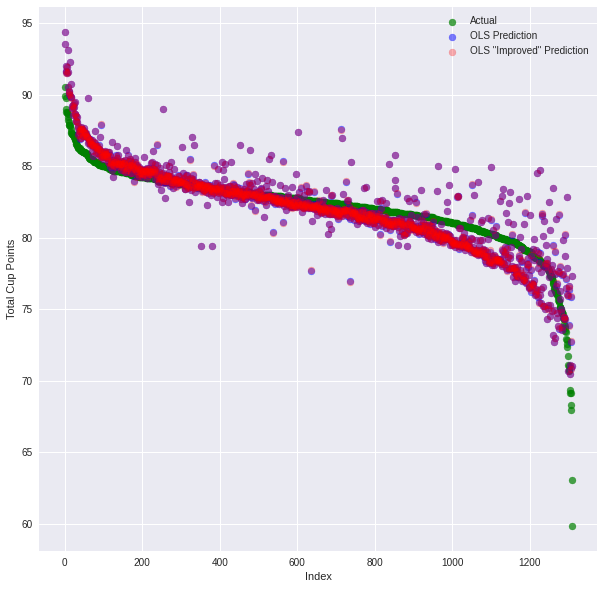

In [141]:
fig, ax = plt.subplots(figsize=(10,10))

OLS_beta = OLS_res.params.reshape(-1,1)

OLS_total = score_np.dot(OLS_beta)

plt.scatter(np.arange(len(total_np)), total_np, color='green', alpha=.7, label='Actual')

plt.scatter(np.arange(len(OLS_total)), OLS_total, color='blue', alpha=.5, label="OLS Prediction")

plt.scatter(np.arange(len(newOLS_total)), newOLS_total, color='red', alpha=.3, label='OLS "Improved" Prediction')

ax.set_xlabel('Index')
ax.set_ylabel('Total Cup Points')
ax.legend();

In [ ]:

# line of model against data, look at error, VIF score


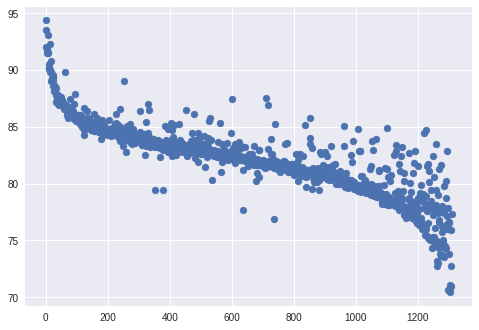

In [145]:
newscore_columns = ['Acidity', 'Aftertaste', 'Aroma', 'Balance', 'Category.One.Defects', 'altitude_mean_meters', 'Body', 'Flavor'] 

newscore_np = coffee_df[newscore_columns]

newscore_np.loc[newscore_np[pd.isna(newscore_np['altitude_mean_meters'])].index,['altitude_mean_meters']] = coffee_df['altitude_mean_meters'].mean()

newscore_np['altitude_mean_meters'].mean()

newOLS_model = sm.OLS(total_np, newscore_np)

newOLS_res = newOLS_model.fit()

newOLS_res.summary()

newOLS_beta = newOLS_res.params

newOLS_total = newscore_np.dot(newOLS_beta)

plt.scatter(np.arange(len(newOLS_total)), newOLS_total)

In [419]:
# coffee_df.info()

In [5]:
coffee_df = coffee_df.drop(index=1310) # removing the single 0 value for total cup points

In [6]:
coffee_df[coffee_df.Species=='Arabica'].describe()

,Unnamed: 0,Number.of.Bags,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness,Cupper.Points,Total.Cup.Points,Moisture,Category.One.Defects,Quakers,Category.Two.Defects,altitude_low_meters,altitude_high_meters,altitude_mean_meters
count,1310.000000,1310.000000,1310.000000,1310.000000,1310.000000,1310.000000,1310.000000,1310.000000,1310.000000,1310.000000,1310.000000,1310.000000,1310.000000,1310.000000,1310.000000,1309.000000,1310.000000,1083.000000,1083.000000,1083.000000
mean,654.500000,153.795420,7.569580,7.523809,7.403344,7.538863,7.523466,7.523244,9.840901,9.840626,9.910832,7.503588,82.178611,0.088840,0.426718,0.177235,3.593130,1759.880948,1809.221313,1784.551131
std,378.308736,129.740068,0.315845,0.341897,0.349867,0.319912,0.293129,0.349304,0.489058,0.722158,0.454991,0.427138,2.686039,0.047967,1.833077,0.840890,5.352233,8771.891186,8771.229129,8771.059495
min,0.000000,0.000000,5.080000,6.080000,6.170000,5.250000,5.250000,6.080000,6.000000,0.000000,1.330000,5.170000,59.830000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,327.250000,14.250000,7.420000,7.330000,7.250000,7.330000,7.330000,7.330000,10.000000,10.000000,10.000000,7.250000,81.170000,0.090000,0.000000,0.000000,0.000000,1100.000000,1100.000000,1100.000000
50%,654.500000,172.500000,7.580000,7.580000,7.420000,7.500000,7.500000,7.500000,10.000000,10.000000,10.000000,7.500000,82.500000,0.110000,0.000000,0.000000,2.000000,1310.640000,1350.000000,1310.640000
75%,981.750000,275.000000,7.750000,7.750000,7.580000,7.750000,7.670000,7.750000,10.000000,10.000000,10.000000,7.750000,83.670000,0.120000,0.000000,0.000000,4.000000,1600.000000,1650.000000,1600.000000
max,1309.000000,1062.000000,8.750000,8.830000,8.670000,8.750000,8.580000,8.750000,10.000000,10.000000,10.000000,10.000000,90.580000,0.280000,31.000000,11.000000,55.000000,190164.000000,190164.000000,190164.000000


In [272]:
# coffee_df[coffee_df['altitude_mean_meters']<100]

In [8]:
# coffee_df['Altitude'].unique()

defect_weight = coffee_df[['Category.One.Defects', 'Category.Two.Defects', 'Quakers']]

In [9]:
coffee_df.loc[[896, 1144], ['Altitude', 'altitude_low_meters', 'altitude_mean_meters', 'altitude_high_meters']]=1901.64

# fixing misplaced decimal in altitude entry

In [10]:
coffee_df.loc[[219],['In.Country.Partner']] = 'Specialty Coffee Association of Costa Rica' 

# Fixing incorrect country partner

In [11]:
coffee_df.loc[[543, 1040], ['Altitude', 'altitude_low_meters', 'altitude_mean_meters', 'altitude_high_meters']]=1100

# Fixing incorrect altitude

In [16]:
coffee_df = coffee_df[coffee_df.Species=='Arabica'].drop('Lot.Number', axis=1).drop('Unnamed: 0', axis=1)

coffee_df = coffee_df.drop('Owner.1', axis=1).drop('ICO.Number', axis=1)

coffee_df = coffee_df.drop('Number.of.Bags', axis=1).drop('Bag.Weight', axis=1)

coffee_df = coffee_df.drop('In.Country.Partner', axis=1).drop('Expiration', axis=1)

coffee_df = coffee_df.drop('unit_of_measurement', axis=1)

In [17]:
defect_weight

,Number.of.Bags,Bag.Weight,Category.One.Defects,Category.Two.Defects,Quakers
0,300,60 kg,0,0,0.0
1,300,60 kg,0,1,0.0
2,5,1,0,0,0.0
3,320,60 kg,0,2,0.0
4,300,60 kg,0,2,0.0
...,...,...,...,...,...
1334,1,2 kg,0,1,0.0
1335,1,2 kg,0,0,0.0
1336,1,1 kg,0,6,0.0
1337,1,5 lbs,20,1,0.0


In [53]:
coffee_df.columns

Index(['Species', 'Owner', 'Country.of.Origin', 'Farm.Name', 'Mill', 'Company',
       'Altitude', 'Region', 'Producer', 'Harvest.Year', 'Grading.Date',
       'Variety', 'Processing.Method', 'Aroma', 'Flavor', 'Aftertaste',
       'Acidity', 'Body', 'Balance', 'Uniformity', 'Clean.Cup', 'Sweetness',
       'Cupper.Points', 'Total.Cup.Points', 'Moisture', 'Category.One.Defects',
       'Quakers', 'Color', 'Category.Two.Defects', 'Certification.Body',
       'Certification.Address', 'Certification.Contact', 'altitude_low_meters',
       'altitude_high_meters', 'altitude_mean_meters'],
      dtype='object')

In [19]:
production_columns = ['Owner', 'Farm.Name', 'Mill', 'Company', 'Region', 'Producer', 'Certification.Body']

In [20]:
coffee_df[production_columns]

,Owner,Farm.Name,Mill,Company,Region,Producer,Certification.Body
0,metad plc,metad plc,metad plc,metad agricultural developmet plc,guji-hambela,METAD PLC,METAD Agricultural Development plc
1,metad plc,metad plc,metad plc,metad agricultural developmet plc,guji-hambela,METAD PLC,METAD Agricultural Development plc
2,grounds for health admin,"san marcos barrancas ""san cristobal cuch",NaN,NaN,NaN,NaN,Specialty Coffee Association
3,yidnekachew dabessa,yidnekachew dabessa coffee plantation,wolensu,yidnekachew debessa coffee plantation,oromia,Yidnekachew Dabessa Coffee Plantation,METAD Agricultural Development plc
4,metad plc,metad plc,metad plc,metad agricultural developmet plc,guji-hambela,METAD PLC,METAD Agricultural Development plc
...,...,...,...,...,...,...,...
1305,cadexsa,cerro bueno,cadexsa,cadexsa,marcala,Omar Acosta,Instituto Hondureño del Café
1306,juan carlos garcia lopez,el centenario,"la esperanza, municipio juchique de ferrer, ve...",terra mia,juchique de ferrer,JUAN CARLOS GARCÍA LOPEZ,AMECAFE
1307,myriam kaplan-pasternak,200 farms,coeb koperativ ekselsyo basen (350 members),haiti coffee,"department d'artibonite , haiti",COEB Koperativ Ekselsyo Basen,Specialty Coffee Association
1308,"exportadora atlantic, s.a.",finca las marías,beneficio atlantic condega,exportadora atlantic s.a,jalapa,Teófilo Narváez,Instituto Hondureño del Café


In [271]:
# coffee_df['Region'].unique()

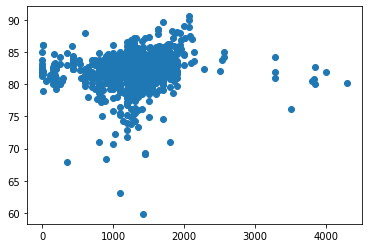

In [440]:
plt.scatter(coffee_df['altitude_mean_meters'], coffee_df['Total.Cup.Points'])


In [54]:
# coffee_df[coffee_df['Country.of.Origin']=='Mexico']['Farm.Name'].unique()

In [297]:
# coffee_df.groupby('altitude_mean_meters').mean()['Total.Cup.Points']

# plt.plot(np.linspace(0, 4300, 199), coffee_df.groupby('altitude_mean_meters').mean()['Total.Cup.Points'])

In [228]:
# Is coffee grown around 2000 meters statistically significantly better at 5% significance level?
# H0 = There is no difference in quality between samples from around 2000 m and other altitudes
# Ha = Coffee grown at around 2000 meters is statistically significantly better

two_thou_alt = coffee_df[(coffee_df['altitude_mean_meters'] > 1800) & (coffee_df['altitude_mean_meters'] < 2200)]['Total.Cup.Points']

other_alt = coffee_df[(coffee_df['altitude_mean_meters'] < 1800) | (coffee_df['altitude_mean_meters'] > 2200)]['Total.Cup.Points']

# Use Mann-Whitney U and CLT t test to take means and test against each other

(57, 993)

In [295]:
res = stats.mannwhitneyu(two_thou_alt, other_alt, alternative='greater')

print("P-value that coffee grown around 2000 meters statistically significantly better: {:2.9f}".format(res.pvalue))


P-value that coffee grown around 2000 meters statistically significantly better: 0.000000001


In [270]:
# coffee_df.groupby('altitude_mean_meters').mean()['Total.Cup.Points'] > 87.5

In [269]:
# coffee_df.groupby('Owner').mean()['Total.Cup.Points']

In [268]:
# coffee_df.groupby('Farm.Name').mean()['Total.Cup.Points']

In [267]:
# coffee_df.groupby('Country.of.Origin').mean()['Total.Cup.Points']

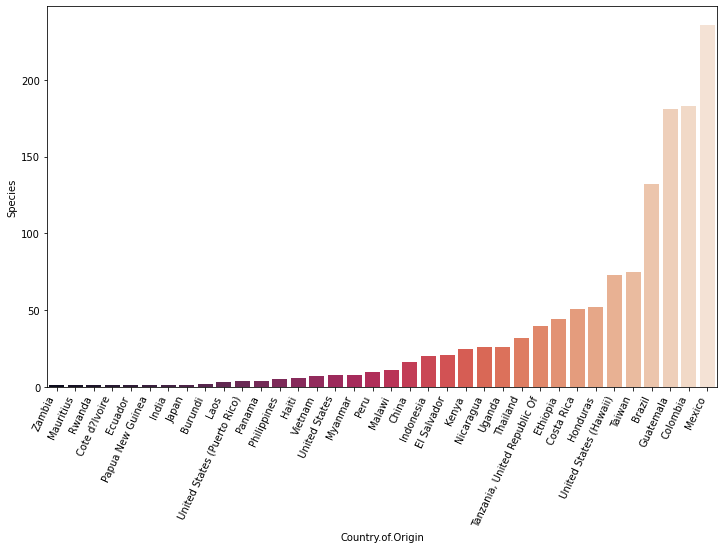

In [287]:
fig, ax = plt.subplots(figsize=(12,7))

rev_per_country = pd.DataFrame(coffee_df.groupby('Country.of.Origin').count()['Species'].sort_values())

# _ = ax.bar(x=rev_per_country['Country.of.Origin'], height=rev_per_country)



sns.barplot(rev_per_country.index, rev_per_country['Species'], palette='rocket')



ax.set_xticklabels(labels=rev_per_country.index, rotation = (65), fontsize = 10, va='top', ha='right');

In [317]:
# Mexico by far has supplied the most samples, does this mean Mexican coffee is better or worse than rest of world?
# In other words, could coffee from Mexico be representative of the global quality of coffee?

mexico_boot_points = coffee_df[coffee_df['Country.of.Origin'] == 'Mexico']['Total.Cup.Points']

rest_of_globe_boot_points = coffee_df[coffee_df['Country.of.Origin'] != 'Mexico']['Total.Cup.Points']

mexico_boot_points = bootstrap_sample_means(mexico_boot_points)

rest_of_globe_boot_points = bootstrap_sample_means(rest_of_globe_boot_points)


(array([  29.,  146.,  662., 1751., 2865., 2686., 1385.,  408.,   62.,
           6.]),
 array([82.1736406 , 82.23317505, 82.2927095 , 82.35224395, 82.4117784 ,
        82.47131285, 82.5308473 , 82.59038175, 82.6499162 , 82.70945065,
        82.7689851 ]),
 <BarContainer object of 10 artists>)

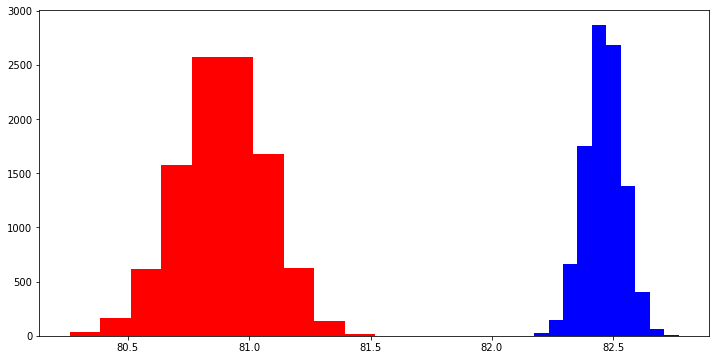

In [318]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.hist(mexico_boot_points, color='red')
ax.hist(rest_of_globe_boot_points, color='blue');

In [319]:

stats.ttest_ind(mexico_boot_points, rest_of_globe_boot_points, equal_var=False)

res = stats.ttest_ind(mexico_boot_points, rest_of_globe_boot_points)

res
print("P-value that coffee grown in Mexico is statistically significantly different: {:2.9f}".format(res.pvalue))

In [351]:
res
print("P-value that coffee grown in Mexico is statistically significantly different: {:2.9f}".format(res.pvalue))


P-value that coffee grown in Mexico is statistically significantly different: 0.000000000


<AxesSubplot:>

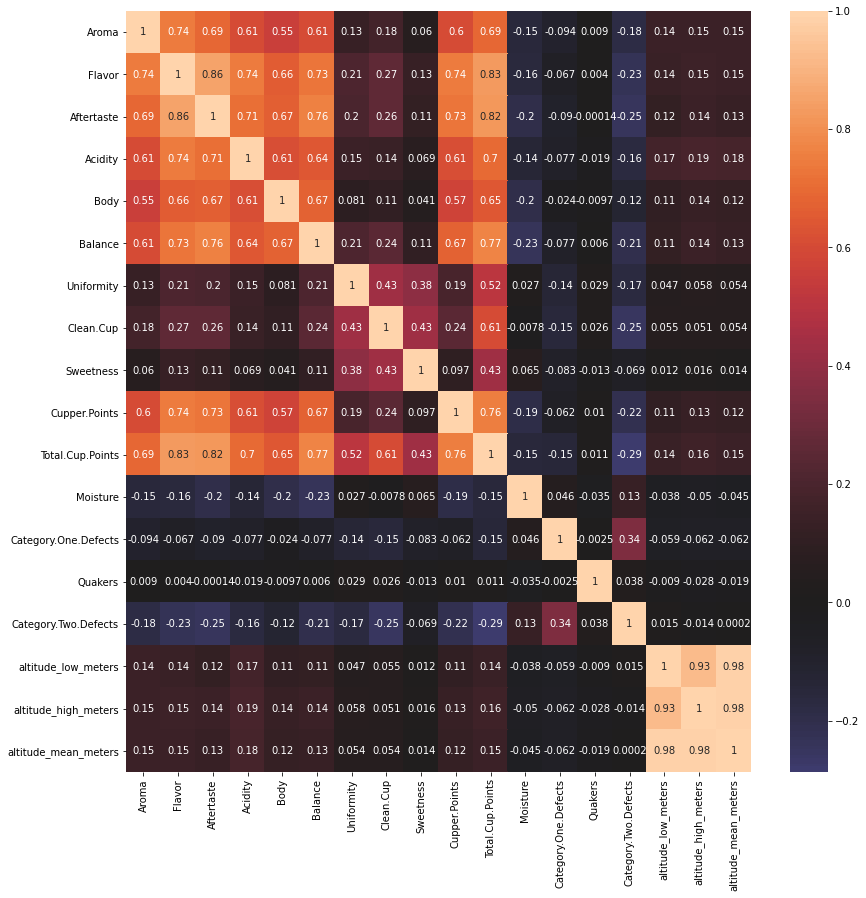

In [262]:
fig, ax = plt.subplots(figsize=(14,14))

sns.set_palette='Mako'

sns.heatmap(coffee_df.corr(), ax=ax, annot=True, center=0)


In [245]:
score_columns = ['Acidity', 'Aftertaste', 'Aroma', 'Balance', 'Category.One.Defects', 'Category.Two.Defects','Body', 'Flavor', 'Total.Cup.Points'] 
corr = coffee_df[score_columns].corr()
# corr = pd.melt(corr.reset_index(), id_vars='index') # Unpivot the dataframe, so we can get pair of arrays for x and y
# corr.columns = ['x', 'y', 'value']

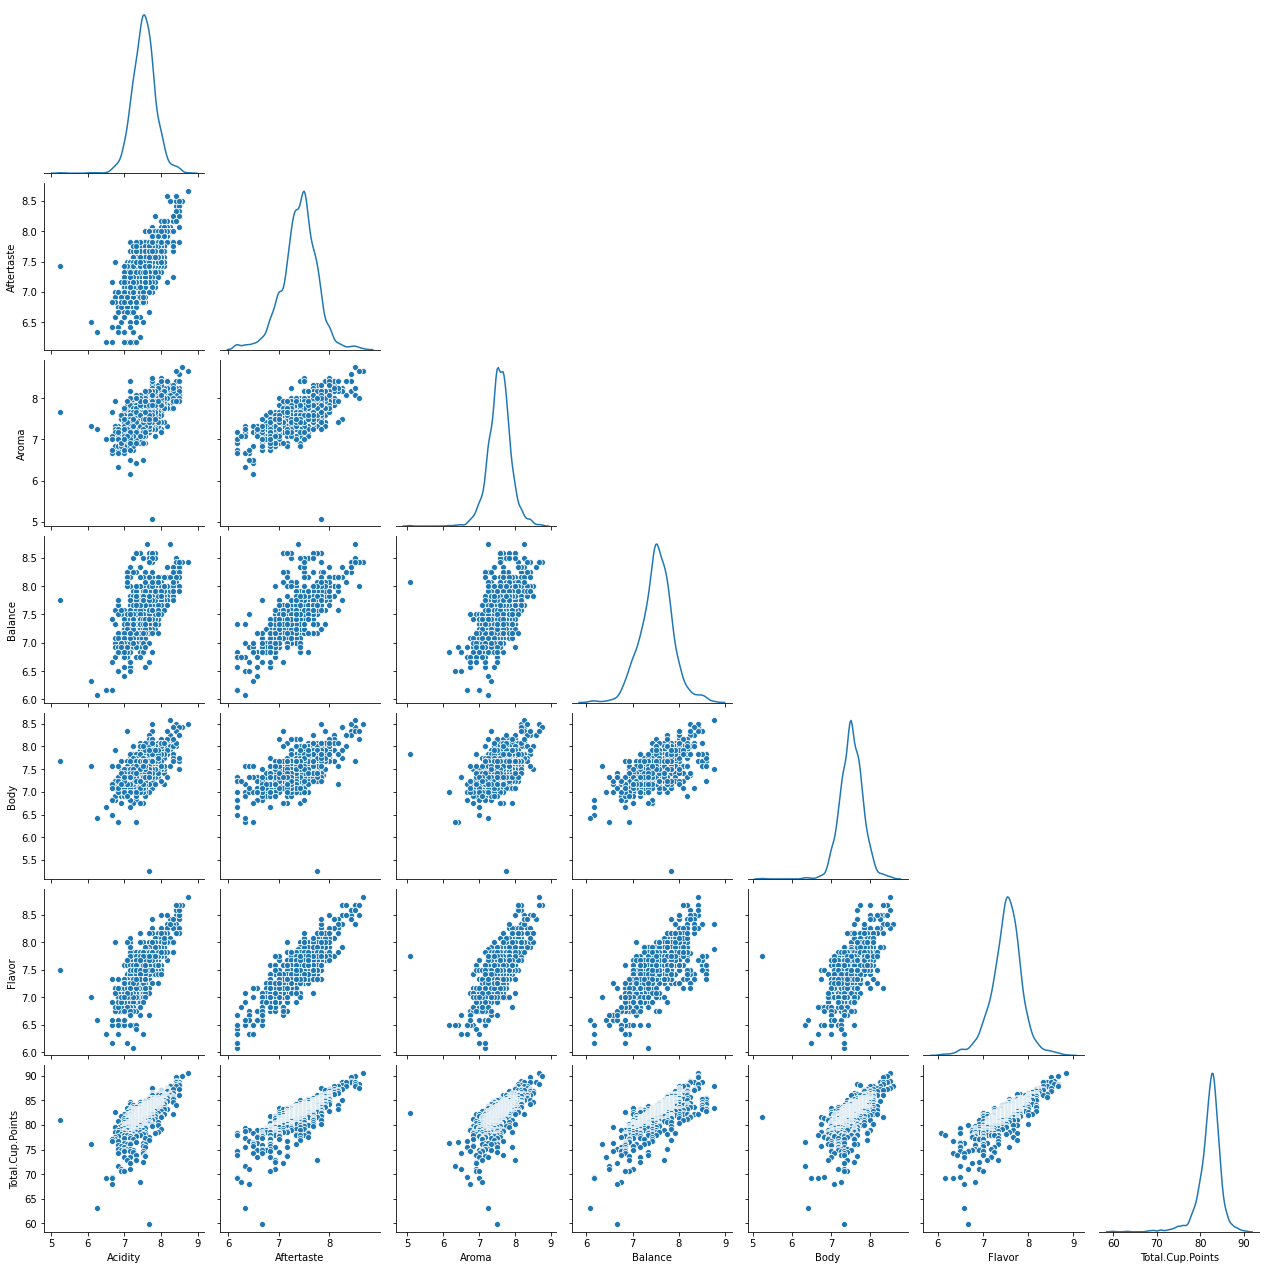

In [284]:
# fig, ax = plt.subplots(figsize=(12,12))

# pd.plotting.scatter_matrix(coffee_df[score_columns], ax=ax);

g = sns.PairGrid(coffee_df[['Acidity', 'Aftertaste', 'Aroma', 'Balance','Body', 'Flavor', 'Total.Cup.Points']], diag_sharey=False, corner=True, palette='rocket')
g.set_palette='rocket'
g.map_diag(sns.kdeplot)
g.map_lower(sns.scatterplot)

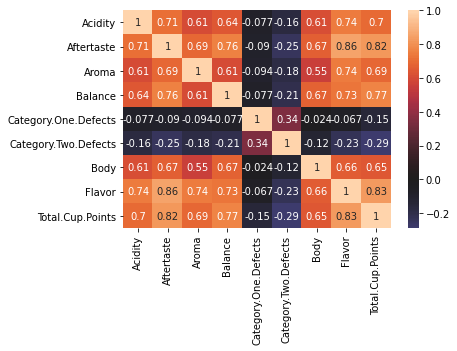

In [286]:
sns.heatmap(corr, annot=True, center=0)
plt.show()

In [186]:
# fig, ax = plt.subplots(1)

# _ = ax.hist(coffee_df['altitude_low_meters'], bins = 100)

# ax.set_xlim(0, 5000)

In [187]:
# fig, ax = plt.subplots(1)

# _ = ax.hist(coffee_df['altitude_high_meters'], bins = 100)

# ax.set_xlim(0, 5000)

In [188]:
# fig, ax = plt.subplots(1)

# _ = ax.hist(coffee_df['altitude_mean_meters'], bins = 100)

# ax.set_xlim(0, 5000)

In [43]:
origin_points = coffee_df[['Country.of.Origin','Total.Cup.Points']]
# origin_points

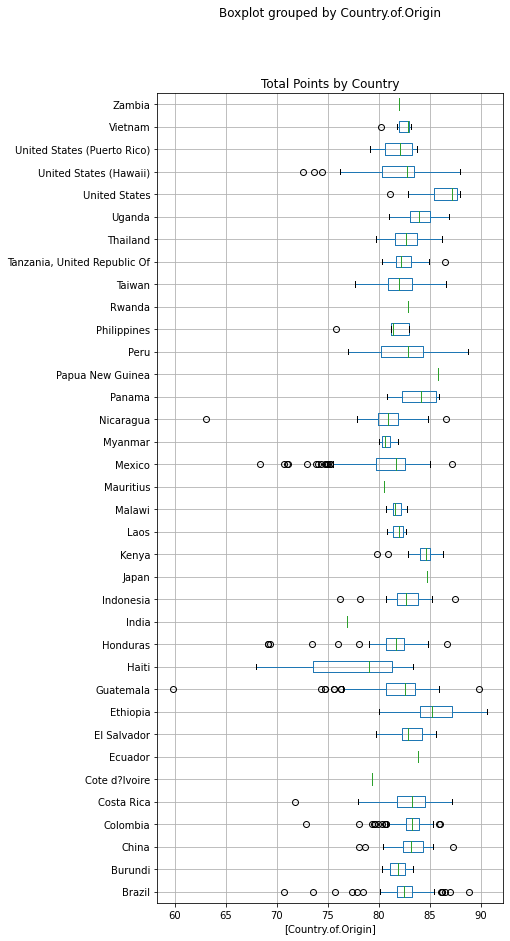

In [184]:
fig, ax = plt.subplots(figsize=(6,15))


origin_points.boxplot(ax=ax, by="Country.of.Origin", vert=False)

ax.set_title('Total Points by Country')

plt.show();

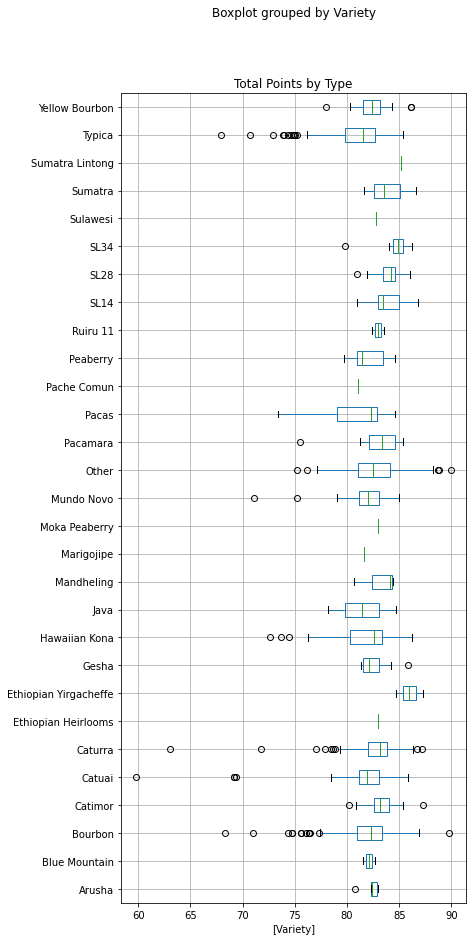

In [185]:
variety_points = coffee_df[['Variety','Total.Cup.Points']]

fig, ax = plt.subplots(figsize=(6,15))


variety_points.boxplot(ax=ax, by="Variety", vert=False)

ax.set_title('Total Points by Type')

plt.show();

In [45]:
coffee_df['Variety'].unique()

array([nan, 'Other', 'Bourbon', 'Catimor', 'Ethiopian Yirgacheffe',
       'Caturra', 'SL14', 'Sumatra', 'SL34', 'Hawaiian Kona',
       'Yellow Bourbon', 'SL28', 'Gesha', 'Catuai', 'Pacamara', 'Typica',
       'Sumatra Lintong', 'Mundo Novo', 'Java', 'Peaberry', 'Pacas',
       'Mandheling', 'Ruiru 11', 'Arusha', 'Ethiopian Heirlooms',
       'Moka Peaberry', 'Sulawesi', 'Blue Mountain', 'Marigojipe',
       'Pache Comun'], dtype=object)

In [46]:
coffee_df['Variety'].isna().sum()

201

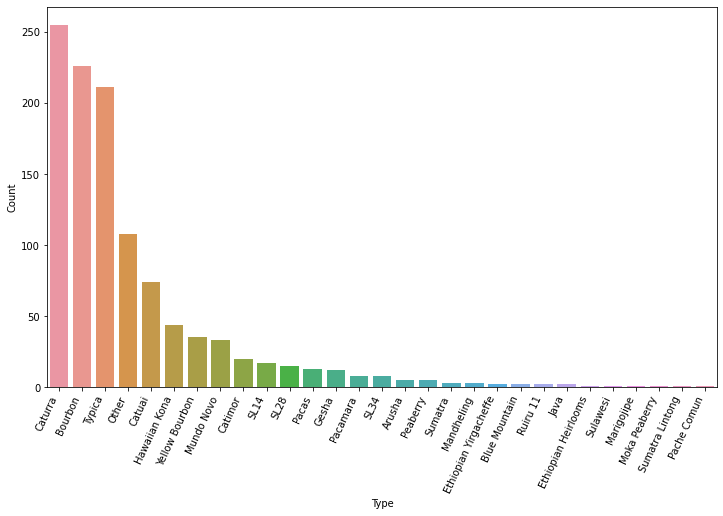

In [47]:
fig, ax = plt.subplots(figsize=(12,7))

variety_x = coffee_df['Variety'].dropna().unique()

variety_y = pd.DataFrame(coffee_df.groupby('Variety').count()["Species"].sort_values(ascending=False))

sns.barplot(variety_y.index, variety_y['Species'])

ax.set_xticklabels(labels=variety_y.index, rotation = (65), fontsize = 10, va='top', ha='right')

ax.set_xlabel("Type")

ax.set_ylabel("Count");


In [ ]:
# coffee_df[columns].head()

In [ ]:
# coffee_df['Aftertaste'].head()

In [ ]:
# coffee_df.Quakers.describe()

In [ ]:
# coffee_df[['Category.One.Defects', 'Category.Two.Defects']]

In [ ]:
# coffee_df.groupby("Country.of.Origin").mean()[['Category.One.Defects', 'Category.Two.Defects']]

In [ ]:
# origin_points.groupby("Country.of.Origin").min()[['Total.Cup.Points']]

In [ ]:
# coffee_df['Color'].unique()

In [ ]:
# coffee_df['Certification.Body'].unique() == coffee_df['In.Country.Partner'].unique()

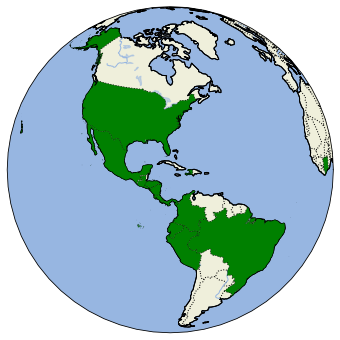

In [350]:
def area(ax, iso, clr) :
    shp = shpreader.natural_earth(resolution='10m',category='cultural',
                                  name='admin_0_countries')
    reader = shpreader.Reader(shp)
    for n in reader.records() :
        if n.attributes['ADM0_A3'] == iso: 
            ax.add_geometries([n.geometry], ccrs.PlateCarree(), facecolor=clr, 
                              alpha = 1.00, linewidth =0.15, edgecolor = "black",
                              label=n.attributes['ADM0_A3']) 
    return ax

# Use flatten to plot on same fig

# iso3 = ['USA','BRA', 'NIC', 'MEX', 'COL', 'SLV', 'ECU', 'HTI', 'CRI', 'HND']

# ['GTM', 'HTI']

plt.figure(figsize=(13,6))

iso3

ax = plt.axes(projection=ccrs.Orthographic(-80,20))
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAKES, alpha=0.5)
ax.add_feature(cfeature.RIVERS)

for n in iso3 :
    area(ax, n, "green")
    
plt.show()

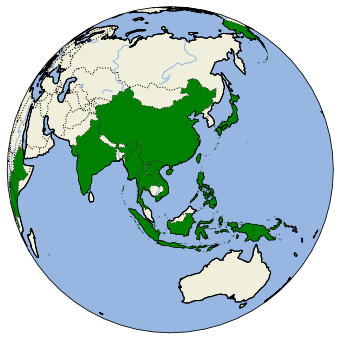

In [349]:
# iso3 = ['CHN','JPN', 'IND', 'IDN', 'MLA', 'THA', 'PNG', 'PHL']

iso3

plt.figure(figsize=(13,6))

ax = plt.axes(projection=ccrs.Orthographic(110,20))
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAKES, alpha=0.5)
ax.add_feature(cfeature.RIVERS)

for n in iso3 :
    area(ax, n, "green")
    
plt.show()

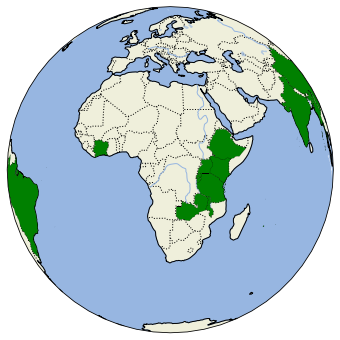

In [348]:
fig, ax = plt.subplots(figsize=(13,6))

ax = plt.axes(projection=ccrs.Orthographic(20,0))

ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAKES, alpha=0.5)
ax.add_feature(cfeature.RIVERS)

for n in iso3 :
    area(ax, n, "green")
    
plt.show();


In [347]:
shp = shpreader.natural_earth(resolution='10m',category='cultural',
                              name='admin_0_countries')
reader = shpreader.Reader(shp)


country_code_dict = {n.attributes['FORMAL_EN']: n.attributes['ADM0_A3'] for n in reader.records()}

for n in reader.records():
    if n.attributes['BRK_NAME'] in country_list:
        iso3.append(n.attributes['ADM0_A3'])

In [36]:
# Country List

country_list = list(coffee_df['Country.of.Origin'].unique())

country_list

['Ethiopia',
 'Guatemala',
 'Brazil',
 'Peru',
 'United States',
 'United States (Hawaii)',
 'Indonesia',
 'China',
 'Costa Rica',
 'Mexico',
 'Uganda',
 'Honduras',
 'Taiwan',
 'Nicaragua',
 'Tanzania, United Republic Of',
 'Kenya',
 'Thailand',
 'Colombia',
 'Panama',
 'Papua New Guinea',
 'El Salvador',
 'Japan',
 'Ecuador',
 'United States (Puerto Rico)',
 'Haiti',
 'Burundi',
 'Vietnam',
 'Philippines',
 'Rwanda',
 'Malawi',
 'Laos',
 'Zambia',
 'Myanmar',
 'Mauritius',
 'Cote d?Ivoire',
 nan,
 'India']

In [380]:
for n in reader.records():
    if n.attributes['BRK_NAME'] == 'Mexico':
        print(n)

Record(MULTIPOLYGON (((-97.13927161399994 25.96580638200004, -97.16746985599991 25.82859935100004, -97.15733801999994 25.78953685100004, -97.16445878799993 25.76951732000009, -97.16515051999994 25.72333405200004, -97.17442786399994 25.70416901200008, -97.18626868399991 25.68695709800005, -97.19815019399994 25.64667389500005, -97.22496497299994 25.58441803600005, -97.26154537699995 25.49945709800005, -97.31944739499994 25.38996002800008, -97.45897376199991 25.17938873900005, -97.55520585849993 24.84762197450004, -97.65143795499995 24.51585521000004, -97.70799719999991 24.08388906500005, -97.7117406889999 24.04913971600007, -97.71666419199994 24.00812409100007, -97.72520911399994 23.80565013200004, -97.73330644399994 23.78839752800008, -97.75096594999991 23.78192780200004, -97.82209225199995 23.78839752800008, -97.82209225199995 23.78221263200004, -97.79442298099991 23.78261953300006, -97.77285722599993 23.78009674700007, -97.75885982999995 23.76902903900009, -97.75381425699993 23.743719

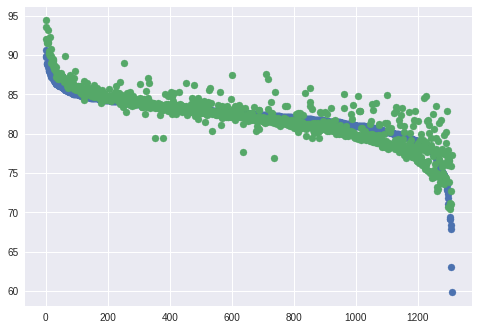

In [494]:
newscore_np = np.array(coffee_df[newscore_columns])

total_np = np.array(coffee_df['Total.Cup.Points']).reshape(-1,1)

newOLS_model = sm.OLS(total_np, newscore_np)

newOLS_res = newOLS_model.fit()

newOLS_res.summary()

newOLS_beta = newOLS_res.params.reshape(-1,1)

plt.scatter(np.arange(len(total_np)), total_np)

newOLS_total = newscore_np.dot(newOLS_beta)



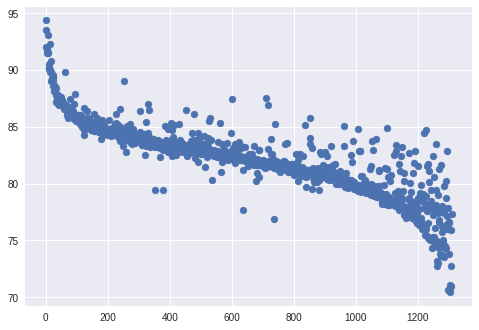

In [144]:
newscore_columns = ['Acidity', 'Aftertaste', 'Aroma', 'Balance', 'Category.One.Defects', 'altitude_mean_meters', 'Body', 'Flavor'] 

newscore_np = coffee_df[newscore_columns]

newscore_np.loc[newscore_np[pd.isna(newscore_np['altitude_mean_meters'])].index,['altitude_mean_meters']] = coffee_df['altitude_mean_meters'].mean()

newscore_np['altitude_mean_meters'].mean()

newOLS_model = sm.OLS(total_np, newscore_np)

newOLS_res = newOLS_model.fit()

newOLS_res.summary()

newOLS_beta = newOLS_res.params

newOLS_total = newscore_np.dot(newOLS_beta)

plt.scatter(np.arange(len(newOLS_total)), newOLS_total)

In [143]:
newscore_np = coffee_df[newscore_columns]


newscore_np.loc[newscore_np[pd.isna(newscore_np['altitude_mean_meters'])].index,['altitude_mean_meters']] = coffee_df['altitude_mean_meters'].mean()

newscore_np['altitude_mean_meters'].mean()

1327.187584856884

In [127]:
total_np = np.array(coffee_df['Total.Cup.Points']).reshape(-1,1)

In [128]:
total_np.shape

(1310, 1)

In [132]:
newOLS_model = sm.OLS(total_np, newscore_np)

In [133]:
newOLS_res = newOLS_model.fit()

In [134]:
print(newOLS_res.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          4.757e+05
Date:                Fri, 30 Oct 2020   Prob (F-statistic):                        0.00
Time:                        10:24:21   Log-Likelihood:                         -2407.8
No. Observations:                1310   AIC:                                      4832.
Df Residuals:                    1302   BIC:                                      4873.
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

In [138]:
newOLS_beta = newOLS_res.params

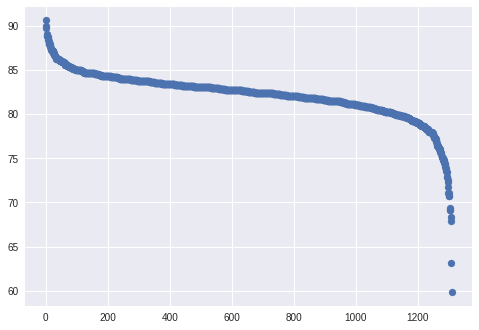

In [139]:
plt.scatter(np.arange(len(total_np)), total_np)

In [140]:
newOLS_total = newscore_np.dot(newOLS_beta)

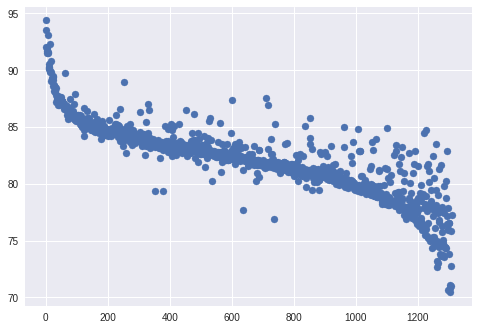

In [526]:
plt.scatter(np.arange(len(newOLS_total)), newOLS_total)

In [ ]:

# line of model against data, look at error, VIF score


In [61]:
# Are defects/quakers poisson distribution? Hypothesis test? Log likelihood
# Use mean and std of total.cup.points to plot pdf or PMF if normal. Hypothesis test if normal?
# Run CLT or boostrap from point stats (plot compared to normal dist with same mean, std)
# What would regression do? goal of regression?


defect_weight['Total.Defects'] = defect_weight['Category.One.Defects'] + defect_weight['Category.Two.Defects'] + defect_weight['Quakers']

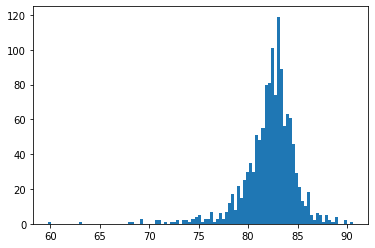

In [62]:
total_points = coffee_df['Total.Cup.Points']


plt.hist(coffee_df['Total.Cup.Points'], bins=100);

In [63]:
(total_points.mean(), total_points.std())

(82.1786106870228, 2.6860386671649508)

In [76]:
tpm, tps = total_points.mean(), total_points.std()

tpm, tps

(82.1786106870228, 2.6860386671649508)

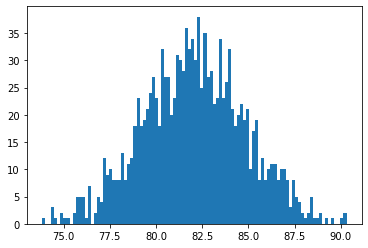

In [77]:
norm = stats.norm(loc=tpm, scale=tps)

plt.hist(norm.rvs(1300), bins=100);

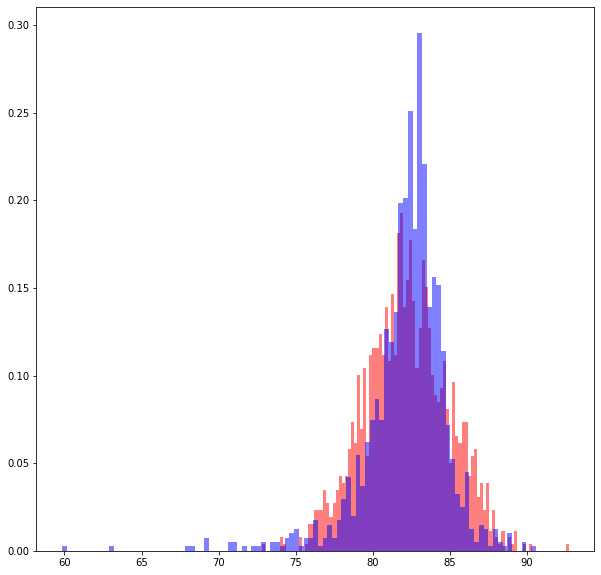

In [66]:
fig, ax = plt.subplots(figsize=(10,10))

ax1 = ax.hist(norm.rvs(1300), bins = 100, alpha=.5, density=True, color='red')

ax2 = ax.hist(total_points, bins=100, alpha=.5, density=True, color='blue')



In [69]:
def empirical_distribution(x, data):
    weight = 1.0 / len(data)
    count = np.zeros(shape=len(x))
    for datum in data:
        count = count + np.array(x >= datum)
    return weight * count


(70.0, 95.0)

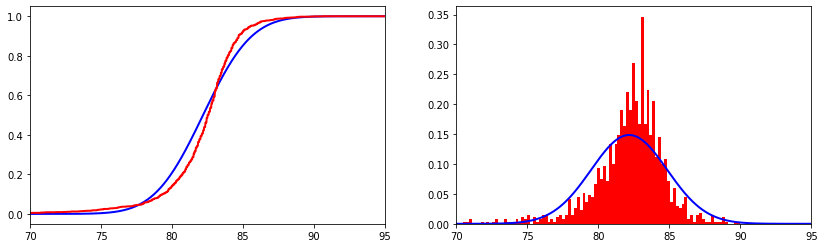

In [70]:
x = np.linspace(70, 99, num=1300)
fig, ax = plt.subplots(1, 2, figsize=(14, 4))

ax[0].plot(x, norm.cdf(x), linewidth=2, color='blue')
ax[0].scatter(0.75, norm.cdf(0.75), s=100)
# ax[0].axhline(y=norm.cdf(0.75), linestyle="--") 
ax[0].set_xlim(70, 95)
ax[0].plot(x, empirical_distribution(x, total_points), linewidth=2, color='red')

# ax[0].set_title("Evaluate the Distribution Function")

ax[1].plot(x, norm.pdf(x), linewidth=2, color='blue')
ax[1].hist(total_points, bins=150, density=True, color='red')
ax[1].set_xlim(70, 95)


In [ ]:

# Distribution of scores appears leptokurtic compared to the theoretical normal distribution
# Use bootstrapping to get mean and plot against normal pdf


In [46]:
def bootstrap_sample_means(data, n_bootstrap_samples=10**4):
    bootstrap_sample_means = []
    for i in range(n_bootstrap_samples):
        bootstrap_sample = np.random.choice(data, size=len(data), replace=True)
        bootstrap_sample_means.append(np.mean(bootstrap_sample))
    return bootstrap_sample_means

82.17903948473283
0.07406286098515057


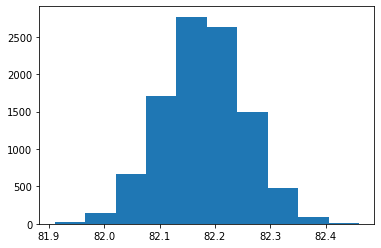

In [73]:
boot_points = bootstrap_sample_means(total_points)

print(np.mean(boot_points))

print(np.std(boot_points))

plt.hist(boot_points);

(81.5, 83.0)

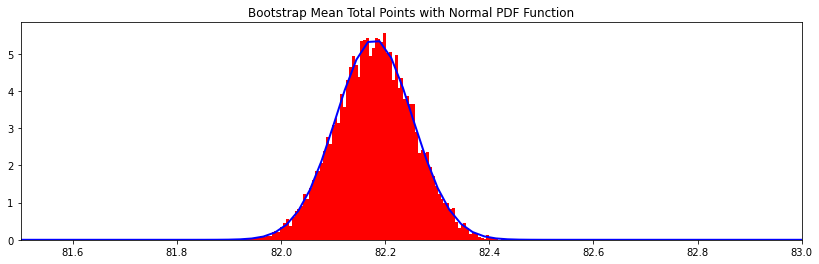

In [74]:
x = np.linspace(70, 99, num=1300)
fig, ax = plt.subplots(figsize=(14, 4))

ax.set_title("Bootstrap Mean Total Points with Normal PDF Function")

ax.plot(x, stats.norm(np.mean(boot_points), np.std(boot_points)).pdf(x), linewidth=2, color='blue')
ax.hist(boot_points, bins=100, density=True, color='red')
ax.set_xlim(81.5, 83)

# CONFIDENCE INTERVAL ABOUT POPULATION MEAN OF COFFEE

In [75]:
defect_weight['Category.One.Defects'].sum()

642

In [76]:
defect_weight['Category.Two.Defects'].sum()

4760

In [149]:
defect_weight['Quakers'].sum()

232.0

In [170]:
defect_weight['Total.Defects'] = defect_weight['Category.One.Defects'] + defect_weight['Category.Two.Defects'] + defect_weight['Quakers']

In [173]:
d_per_s = (defect_weight['Total.Defects']/(defect_weight['Total.Defects'].count())).sum()

In [174]:
d_per_s # defects (both categories and quakers) per sample

4.212415856394914

In [175]:
# poisson = lambda**k * e**-lambda/k!

In [176]:
pois = stats.poisson(d_per_s)

test_x = np.linspace(0,10,1000)

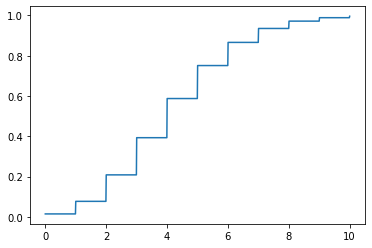

In [177]:
plt.plot(test_x, pois.cdf(test_x))

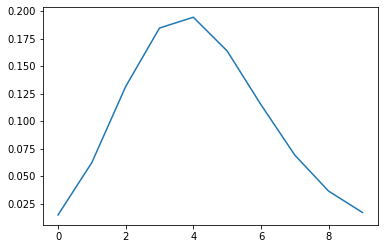

In [178]:
fig, ax = plt.subplots()

x = np.arange(stats.poisson.ppf(0.01, d_per_s),
              stats.poisson.ppf(0.99, d_per_s))

# ax.set_ylim(-1,1)

ax.plot(x, stats.poisson.pmf(k=x, mu=d_per_s));

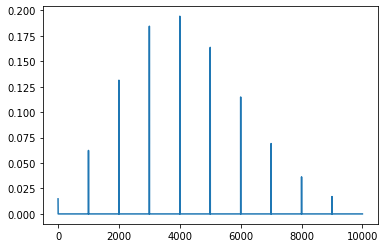

In [421]:
x= np.arange(0, 10, .001)
plt.plot(stats.poisson.pmf(x, d_per_s))

plt.show()


In [429]:
def superimpose_cdf_of_fit_model(data, model, ax, x_lower=-3, x_upper=3):
    x = np.linspace(x_lower, x_upper, num=10000)
    ax.plot(x, empirical_distribution(x, data), linewidth=2, label='True Defects')
    ax.plot(x, model.cdf(x), linewidth=2, label='Poisson CDF')

/home/mario/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in greater_equal
  """


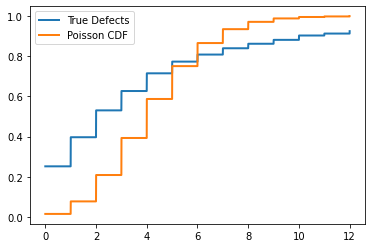

In [430]:
fig, ax = plt.subplots()

superimpose_cdf_of_fit_model(defect_weight['Total.Defects'], stats.poisson(mu=d_per_s), ax=ax, x_lower=0, x_upper=12)

ax.legend()

In [287]:

# Pearson Chi-Square goodness of fit for Poisson


In [288]:
def generate_label(param_names, param_values):
    '''Generate parameter labels for the legend'''
    params = ["{}={}".format(name,value) for name, value in zip(param_names, param_values)
              if name is not None]
    return ", ".join(params)

def draw_pmf(ax, dist, param_names, param_values, xpts):
    '''draw a pmf as part of a set of pmfs'''
    label = generate_label(param_names, param_values)
    ax.bar(xpts, 
           [dist(*param_values).pmf(x) for x in xpts], 
           label=label, 
           align='center',
           color='grey')
    
def draw_pmf_grid(dist, param_names, param_values, xpts, height=2.5):
    '''draw several pmfs for for various parameter values for a given distribution'''
    figsize = (12, height * len(param_values))
    fig = plt.figure(figsize=figsize)
    for i, pv in enumerate(param_values, start=1):
        if i == 1:
            ax = ax1 = fig.add_subplot(len(param_values), 1, i)
        else:
            ax = fig.add_subplot(len(param_values), 1, i, sharey=ax1)
        draw_pmf(ax, dist, param_names, pv, xpts)
        ax.set_ylabel('p')
        ax.set_ylim(bottom=0)
        ax.set_xlim(left=min(xpts) - 0.5, right=max(xpts) + 0.5)
        ax.legend(frameon=True)
        plt.xticks(np.arange(min(xpts), np.ceil(max(xpts))+1)) ## force integer ticks
    plt.show()
    
def draw_pdf(ax, dist, param_names, param_values, xpts):
    '''draw a pdf of a given distribution for given parameters'''
    label = generate_label(param_names, param_values)
    ax.plot(xpts, [dist(*param_values).pdf(x) for x in xpts], label=label, linewidth=2)
    
def draw_cdf(ax, dist, param_names, param_values, xpts):
    label = generate_label(param_names, param_values)
    ax.plot(xpts, [dist(*param_values).cdf(x) for x in xpts], label=label, linewidth=2)  

def draw_continuous_distributions(dist, param_names, param_values, xmin, xmax, figsize=(8,6)):
    '''draw several pdfs for for various parameter values for a given distribution'''   
    fig, axs = plt.subplots(1, 2, figsize=(12, 4))
    xpts = np.linspace(xmin, xmax, 200)
    for pv in param_values:
        draw_cdf(axs[0], dist, param_names, pv, xpts)
        draw_pdf(axs[1], dist, param_names, pv, xpts)
    axs[0].set_ylabel('Cumulative Distribution')
    axs[1].set_ylabel('Probability Density')
    axs[0].legend()
    axs[1].legend()

In [140]:
data_with_lat = coffee_df.merge(country_data, 'left', left_on='Country.of.Origin', right_on='name')

In [141]:
data_with_lat.head()

,Species,Owner,Country.of.Origin,Farm.Name,Mill,Company,Altitude,Region,Producer,Harvest.Year,...,Certification.Body,Certification.Address,Certification.Contact,altitude_low_meters,altitude_high_meters,altitude_mean_meters,country,latitude,longitude,name
0,Arabica,metad plc,Ethiopia,metad plc,metad plc,metad agricultural developmet plc,1950-2200,guji-hambela,METAD PLC,2014,...,METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,1950.0,2200.0,2075.0,ET,9.145000,40.489673,Ethiopia
1,Arabica,metad plc,Ethiopia,metad plc,metad plc,metad agricultural developmet plc,1950-2200,guji-hambela,METAD PLC,2014,...,METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,1950.0,2200.0,2075.0,ET,9.145000,40.489673,Ethiopia
2,Arabica,grounds for health admin,Guatemala,"san marcos barrancas ""san cristobal cuch",NaN,NaN,1600 - 1800 m,NaN,NaN,NaN,...,Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,1600.0,1800.0,1700.0,GT,15.783471,-90.230759,Guatemala
3,Arabica,yidnekachew dabessa,Ethiopia,yidnekachew dabessa coffee plantation,wolensu,yidnekachew debessa coffee plantation,1800-2200,oromia,Yidnekachew Dabessa Coffee Plantation,2014,...,METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,1800.0,2200.0,2000.0,ET,9.145000,40.489673,Ethiopia
4,Arabica,metad plc,Ethiopia,metad plc,metad plc,metad agricultural developmet plc,1950-2200,guji-hambela,METAD PLC,2014,...,METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,1950.0,2200.0,2075.0,ET,9.145000,40.489673,Ethiopia


In [145]:
data_with_lat[pd.isna(data_with_lat['latitude'])]['Country.of.Origin'].unique()

array(['United States (Hawaii)', 'Tanzania, United Republic Of',
       'United States (Puerto Rico)', 'Myanmar', 'Cote d?Ivoire', nan],
      dtype=object)

In [177]:
data_with_lat.loc[data_with_lat[data_with_lat['Country.of.Origin']=='Tanzania, United Republic Of'].index,['latitude']]=-6.369028

In [178]:
data_with_lat[data_with_lat['Country.of.Origin']=='Tanzania, United Republic Of']

,Species,Owner,Country.of.Origin,Farm.Name,Mill,Company,Altitude,Region,Producer,Harvest.Year,...,Certification.Body,Certification.Address,Certification.Contact,altitude_low_meters,altitude_high_meters,altitude_mean_meters,country,latitude,longitude,name
31,Arabica,specialty coffee-korea,"Tanzania, United Republic Of",NaN,NaN,NaN,NaN,NaN,NaN,2012,...,Specialty Coffee Institute of Asia,726e4891cf2c9a4848768bd34b668124d12c4224,b70da261fcc84831e3e9620c30a8701540abc200,NaN,NaN,NaN,NaN,-6.369028,NaN,NaN
109,Arabica,taylor winch (t) ltd,"Tanzania, United Republic Of",hasambo amcos,taylor winch (t) ltd,taylor winch (t) ltd,1620m,mbeya,Hasambo AMCOS,2014,...,Africa Fine Coffee Association,073285c0d45e2f5539012d969937e529564fa6fe,c4ab13415cdd69376a93780c0166e7b1a10481ea,1620.0,1620.0,1620.0,NaN,-6.369028,NaN,NaN
201,Arabica,tembo coffee company ltd,"Tanzania, United Republic Of",jacksom mwasenga,tembo coffee company ltd,tembo coffee company ltd,1620m,shizingo village,Tembo Coffee Company Ltd,2014,...,Africa Fine Coffee Association,073285c0d45e2f5539012d969937e529564fa6fe,c4ab13415cdd69376a93780c0166e7b1a10481ea,1620.0,1620.0,1620.0,NaN,-6.369028,NaN,NaN
202,Arabica,taylor winch (t) ltd,"Tanzania, United Republic Of",suma jkt itende,taylor winch (t) ltd,taylor winch (t) ltd,1600,mbeya,Taylor Winch (T) ltd,2014,...,Africa Fine Coffee Association,073285c0d45e2f5539012d969937e529564fa6fe,c4ab13415cdd69376a93780c0166e7b1a10481ea,1600.0,1600.0,1600.0,NaN,-6.369028,NaN,NaN
221,Arabica,selian coffee estate,"Tanzania, United Republic Of",selian coffee estate,selian coffee estate,selian coffee estate,1400,arusha,Selian Coffee Estate,2014,...,Africa Fine Coffee Association,073285c0d45e2f5539012d969937e529564fa6fe,c4ab13415cdd69376a93780c0166e7b1a10481ea,1400.0,1400.0,1400.0,NaN,-6.369028,NaN,NaN
357,Arabica,damari absalome,"Tanzania, United Republic Of",ano family,arusha,tawoca,1400m,nkure- meru,Mr & Mrs Damari Absalome,2015,...,Africa Fine Coffee Association,073285c0d45e2f5539012d969937e529564fa6fe,c4ab13415cdd69376a93780c0166e7b1a10481ea,1400.0,1400.0,1400.0,NaN,-6.369028,NaN,NaN
385,Arabica,ngila estate ltd,"Tanzania, United Republic Of",ngila estate,ngila estate ltd,ngila estate ltd,1600,karatu northern,Ngila Estate Ltd,2014,...,Africa Fine Coffee Association,073285c0d45e2f5539012d969937e529564fa6fe,c4ab13415cdd69376a93780c0166e7b1a10481ea,1600.0,1600.0,1600.0,NaN,-6.369028,NaN,NaN
402,Arabica,afca,"Tanzania, United Republic Of",mondul coffee estate,mondul coffee estate,mondul coffee estate,1700,arusha,Mondul Coffee Estate,2014,...,Africa Fine Coffee Association,073285c0d45e2f5539012d969937e529564fa6fe,c4ab13415cdd69376a93780c0166e7b1a10481ea,1700.0,1700.0,1700.0,NaN,-6.369028,NaN,NaN
442,Arabica,taylor winch (t) ltd,"Tanzania, United Republic Of",mamsera,rafiki (coffee) limited,volcafe/taylorwinch tanzania ltd,16.8,moshi,Mamsera,2016,...,Tanzanian Coffee Board,047484d5700c44f033915e632e0c6013d985cd79,127e651fc8b7c35802268599656f2c76bf041b15,168.0,168.0,168.0,NaN,-6.369028,NaN,NaN
454,Arabica,tutunze kahawa ltd,"Tanzania, United Republic Of",myanganyanga,tutunze kahawa ltd,tutunze kahawa ltd,1653,mbinga,Tutunze Kahawa Ltd,2014,...,Africa Fine Coffee Association,073285c0d45e2f5539012d969937e529564fa6fe,c4ab13415cdd69376a93780c0166e7b1a10481ea,1653.0,1653.0,1653.0,NaN,-6.369028,NaN,NaN


In [174]:
data_with_lat.loc[data_with_lat[data_with_lat['Country.of.Origin']=='Myanmar'].index,['latitude']]=21.913965

In [175]:
data_with_lat[data_with_lat['Country.of.Origin']=='Myanmar']

,Species,Owner,Country.of.Origin,Farm.Name,Mill,Company,Altitude,Region,Producer,Harvest.Year,...,Certification.Body,Certification.Address,Certification.Contact,altitude_low_meters,altitude_high_meters,altitude_mean_meters,country,latitude,longitude,name
840,Arabica,u mg mg,Myanmar,wat-ka-bu,NaN,NaN,4001,ywar ngan,U Mg Mg,2015,...,Coffee Quality Institute,1d4c7f93129f9fb1c8a5f0ce0e36cc1cf4c2f4d7,0f62c9236e3ff5c4921da1e22a350aa99482779d,4001.0,4001.0,4001.0,NaN,21.913965,NaN,NaN
915,Arabica,genius coffee,Myanmar,mixed,genius coffee estate,"aung nay lin htun co., ltd",4000 ft,ywar ngan township,Genius Coffee Estate,2015,...,Coffee Quality Institute,1d4c7f93129f9fb1c8a5f0ce0e36cc1cf4c2f4d7,0f62c9236e3ff5c4921da1e22a350aa99482779d,1219.2,1219.2,1219.2,NaN,21.913965,NaN,NaN
1017,Arabica,min hlaing,Myanmar,sithar coffee farm,local made,"sithar coffee co., ltd.",3500 ft,pyinoolwin,Min Hlaing,2015,...,Coffee Quality Institute,1d4c7f93129f9fb1c8a5f0ce0e36cc1cf4c2f4d7,0f62c9236e3ff5c4921da1e22a350aa99482779d,1066.8,1066.8,1066.8,NaN,21.913965,NaN,NaN
1038,Arabica,u soe,Myanmar,myaing,NaN,NaN,3825,ywar ngan,U Soe,2015,...,Coffee Quality Institute,1d4c7f93129f9fb1c8a5f0ce0e36cc1cf4c2f4d7,0f62c9236e3ff5c4921da1e22a350aa99482779d,3825.0,3825.0,3825.0,NaN,21.913965,NaN,NaN
1073,Arabica,shwe yin mar coffee,Myanmar,mixed,shwe yin mar,shwe yin mar coffee,3800,pyin oo lwin,Shwe Yin Mar,2015,...,Coffee Quality Institute,1d4c7f93129f9fb1c8a5f0ce0e36cc1cf4c2f4d7,0f62c9236e3ff5c4921da1e22a350aa99482779d,3800.0,3800.0,3800.0,NaN,21.913965,NaN,NaN
1097,Arabica,bob mccauley,Myanmar,waylead farms,green beans,"waylead industrial co, ltd.",3000 ft,"yauk sauk, shan state","Waylead Co, Ltd",2015,...,Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,914.4,914.4,914.4,NaN,21.913965,NaN,NaN
1098,Arabica,u htun htun,Myanmar,thein kone,NaN,NaN,4287,ywar ngan,U Htun Htun,2014,...,Coffee Quality Institute,1d4c7f93129f9fb1c8a5f0ce0e36cc1cf4c2f4d7,0f62c9236e3ff5c4921da1e22a350aa99482779d,4287.0,4287.0,4287.0,NaN,21.913965,NaN,NaN
1123,Arabica,ngu shwe li,Myanmar,doe kwin,ngu shwe li coffee estate,ngu shwe li coffee estate,3845,"doe kwin, pyin oo lwin",Ngu Shwe Li Coffee Estate,2015,...,Coffee Quality Institute,1d4c7f93129f9fb1c8a5f0ce0e36cc1cf4c2f4d7,0f62c9236e3ff5c4921da1e22a350aa99482779d,3845.0,3845.0,3845.0,NaN,21.913965,NaN,NaN


In [171]:
data_with_lat.loc[data_with_lat[data_with_lat['Country.of.Origin']=="Cote d?Ivoire"].index,['latitude']]=7.539989

In [172]:
data_with_lat[data_with_lat['Country.of.Origin']=="Cote dIvoire"]

,Species,Owner,Country.of.Origin,Farm.Name,Mill,Company,Altitude,Region,Producer,Harvest.Year,...,Certification.Body,Certification.Address,Certification.Contact,altitude_low_meters,altitude_high_meters,altitude_mean_meters,country,latitude,longitude,name
1177,Arabica,rre kunene,Cote d?Ivoire,cnra station of divo,cnra station of divo,royal 1750 coffee,200,cnra station of divo,CNRA,2016,...,Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,200.0,200.0,200.0,NaN,7.539989,NaN,NaN


In [155]:
country_data[(country_data['name']=='Tanzania') | (country_data['name']=='Myanmar [Burma]') | (country_data['name']=="C?te d'Ivoire")]

,country,latitude,longitude,name
41,CI,7.539989,-5.547080,C?te d'Ivoire
142,MM,21.913965,95.956223,Myanmar [Burma]
223,TZ,-6.369028,34.888822,Tanzania


In [154]:
country_data['name'].unique()

array(['Andorra', 'United Arab Emirates', 'Afghanistan',
       'Antigua and Barbuda', 'Anguilla', 'Albania', 'Armenia',
       'Netherlands Antilles', 'Angola', 'Antarctica', 'Argentina',
       'American Samoa', 'Austria', 'Australia', 'Aruba', 'Azerbaijan',
       'Bosnia and Herzegovina', 'Barbados', 'Bangladesh', 'Belgium',
       'Burkina Faso', 'Bulgaria', 'Bahrain', 'Burundi', 'Benin',
       'Bermuda', 'Brunei', 'Bolivia', 'Brazil', 'Bahamas', 'Bhutan',
       'Bouvet Island', 'Botswana', 'Belarus', 'Belize', 'Canada',
       'Cocos [Keeling] Islands', 'Congo [DRC]',
       'Central African Republic', 'Congo [Republic]', 'Switzerland',
       "C?te d'Ivoire", 'Cook Islands', 'Chile', 'Cameroon', 'China',
       'Colombia', 'Costa Rica', 'Cuba', 'Cape Verde', 'Christmas Island',
       'Cyprus', 'Czech Republic', 'Germany', 'Djibouti', 'Denmark',
       'Dominica', 'Dominican Republic', 'Algeria', 'Ecuador', 'Estonia',
       'Egypt', 'Western Sahara', 'Eritrea', 'Spain', 'Ethi